# [Evaluation Metrics]

Explore, easy test of evaluation metrics for the detectors



# Setup

## Library import
We import all the required Python libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
# from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [3]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [4]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
# from src.plibs.utils import plots as myplots

In [5]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [36]:
# DATA_PATH = "../data/data/detection_dataset/20231030_145712_databricks-dolly_size-1000_melted_stats.tsv"
# DATA_PATH = "../data/data/detection_dataset/final_datasets/20231206_145550_databricks-dolly_size-2000_benchmark_melted_stats.tsv"
# DATA_PATH = "../artifacts/ds_detection:v2/dataset.tsv"
# DATA_PATH = "../data/data/detection_dataset/final_datasets_20231212/core_preprocessed.tsv"
DATA_PATH = "../out/benchmark_melted_stats_preprocessed.tsv"
DATA_PATH_WATTI = "../artifacts/writters_attitude:v1/merged_fmt.tsv"


# Data import
We retrieve all the required data for the analysis.

In [37]:
df = pd.read_csv(DATA_PATH, sep="\t", index_col=[0])
# df = pd.read_csv(DATA_PATH, sep="\t")
# df.dropna(subset=["response"], inplace=True)
# df = df[df.tokeep==1]
print(df.shape)
df.head()

(25440, 45)


,instruction,context,category,data_id,model,response,id,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,detector_chatgpt_qa_detector_score,detector_chatgpt_qa_detector_label,detector_xlmr_chatgptdetect_noisy_score,detector_xlmr_chatgptdetect_noisy_label,detector_llm_det_GPT-2,detector_llm_det_Human_write,detector_llm_det_T5,detector_llm_det_OPT,detector_llm_det_UniLM,detector_llm_det_LLaMA,detector_llm_det_GPT-neo,detector_llm_det_Bloom,detector_llm_det_BART,detector_radar_vicuna_7B_ai_prob,tokeep,detector_llm_det_label,detector_radar_vicuna_7B_label
0,What is Douglas Stuart Moore's best remembered...,"Douglas Stuart Moore (August 10, 1893 – July 2...",closed_qa,bdecc6e7d8d24f4ba94f863ed20c6410,human,The Ballad of Baby Doe (1956) as it has remain...,7398f0cf4e344d99a592b3e47a43cded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.187500,40.5,8.50,0.256098,0.402439,0.036585,0.375000,16.0,2.0,1.000000,0.125000,0.052632,0.105263,0.052632,0.999398,LABEL_0,0.999622,HUMAN,0.345098,0.130760,0.027603,0.144393,0.000473,0.350650,0.000846,0.000157,0.000020,0.999568,1,LLaMA,LLM
1,What is hidden at Oak Island?,Oak Island has been a subject for treasure hun...,closed_qa,7d5e10b1739b46aea06e749aa8640af5,human,Oak Island is rumored to have Captain Kidd's t...,1f4e3da890ca455eab7ebc2d193ef857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.809524,70.5,11.25,0.326316,0.459649,0.024561,0.309524,42.0,4.0,0.952381,0.238095,0.163265,0.142857,0.081633,0.995518,LABEL_0,0.999998,HUMAN,0.022742,0.729122,0.002628,0.017152,0.004419,0.222544,0.000890,0.000108,0.000395,0.999275,1,Human_write,LLM
2,"Given this short paragraph about Belize, how m...","Belize, formerly known as British Honduras, is...",closed_qa,2c74f0f6a8594d358d17e76b6d1a46fe,human,"Belize has a population of 408,487 people and ...",5d592187183e436a8233da809eb517d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.250000,49.0,8.50,0.323232,0.414141,0.020202,0.437500,16.0,2.0,0.875000,0.187500,0.235294,0.117647,0.058824,0.966749,LABEL_1,0.984452,CHATGPT,0.447875,0.013407,0.143565,0.144139,0.018714,0.230891,0.001074,0.000262,0.000074,0.997674,1,GPT-2,LLM
3,Who are the little Japanese girls who find Tot...,"In 1950s Japan, university professor Tatsuo Ku...",closed_qa,9acb5f501fb9479fbf5e559a5084741f,human,Mei and Satsuki are the two Japanese girls who...,aaeeb470c44d4333843fbdfea92ba973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.947368,55.5,10.00,0.366071,0.392857,0.008929,0.315789,19.0,2.0,0.894737,0.210526,0.100000,0.050000,0.150000,0.985535,LABEL_0,0.746025,HUMAN,0.120863,0.232131,0.278564,0.244336,0.011341,0.106691,0.004357,0.000411,0.001307,0.999139,1,T5,LLM
4,Given a reference text about the Bakersfield M...,"The Bakersfield Majestics, formerly the Bakers...",closed_qa,1451afe6a68e4fe29817b012aa3fceda,human,The Bakersfield Majestics played its games at ...,e2abfd2550864f04bafdf6dadcf6a589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.550000,64.5,10.50,0.292308,0.438462,0.015385,0.350000,20.0,2.0,1.000000,0.250000,0.045455,0.045455,0.000000,0.998065,LABEL_0,0.999660,HUMAN,0.310225,0.410966,0.033845,0.052306,0.024170,0.154478,0.012584,0.000803,0.000623,0.998706,1,Human_write,LLM


In [11]:
# Load writers attitudes
# ds_watti = pd.read_csv("../out/merged_fmt.tsv", sep='\t', index_col=[0])
# ds_watti = pd.read_csv("../out/merged_fmt.tsv", sep='\t', index_col=[0])
ds_watti = pd.read_csv("../artifacts/writters_attitude:v1/merged_fmt.tsv", sep='\t', index_col=[0])
print(ds_watti.shape)
display(ds_watti.head())

# assign top1 label for each 
for atti in ["emotion_", "irony_", "convincingness_"]:
    ds_watti[f"{atti}top1_label"] = ds_watti[[c for c in ds_watti.columns if (atti in c and not c.endswith("top1_label"))]].idxmax(axis=1)
    ds_watti[f"{atti}top1_score"] = ds_watti[[c for c in ds_watti.columns if (atti in c and not c.endswith("top1_label"))]].max(axis=1)
    ds_watti[f"{atti}top1_label"] = ds_watti[f"{atti}top1_label"].apply(lambda v: v[v.find("_")+1:])
print(f"{ds_watti.shape} -> {ds_watti.columns}")

display( ds_watti.head() )



(16000, 34)


,emotion_admiration,emotion_amusement,emotion_anger,emotion_annoyance,emotion_approval,emotion_caring,emotion_confusion,emotion_curiosity,emotion_desire,emotion_disappointment,emotion_disapproval,emotion_disgust,emotion_embarrassment,emotion_excitement,emotion_fear,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing,_non_persuasive,_persuasive
0,0.001631,0.000391,0.000110,0.000658,0.034105,0.000314,0.000648,0.000177,0.000292,0.000956,0.000733,0.000258,0.000195,0.000372,0.000255,0.000313,0.000158,0.000667,0.000551,0.000164,0.001479,0.000261,0.037376,0.000485,0.000168,0.000671,0.000445,0.916168,0.856211,0.143789,0.932959,0.067041,0.936460,0.063540
1,0.000736,0.000450,0.000431,0.006389,0.005423,0.000260,0.034596,0.003490,0.000547,0.080460,0.067741,0.001111,0.001826,0.000417,0.000747,0.000268,0.000452,0.000366,0.000534,0.000734,0.001567,0.000096,0.014901,0.000334,0.000838,0.008091,0.001745,0.765449,0.773672,0.226328,0.911507,0.088493,0.922532,0.077468
2,0.000537,0.000280,0.000535,0.009192,0.008986,0.000294,0.000856,0.000326,0.000502,0.037765,0.031255,0.001319,0.000887,0.000177,0.000316,0.000155,0.000302,0.000356,0.000370,0.000317,0.000756,0.000138,0.015717,0.000461,0.000438,0.006748,0.000490,0.880524,0.506302,0.493698,0.992903,0.007097,0.933045,0.066955
3,0.007185,0.001574,0.000116,0.000564,0.024416,0.000155,0.000776,0.000636,0.000348,0.000663,0.000294,0.000604,0.000292,0.003240,0.000511,0.000195,0.000150,0.001708,0.001968,0.000172,0.000766,0.000352,0.020511,0.000307,0.000135,0.000400,0.002081,0.929880,0.338794,0.661206,0.396420,0.603580,0.916641,0.083359
4,0.000266,0.000228,0.000046,0.000595,0.007113,0.000078,0.000566,0.000173,0.000135,0.000528,0.000528,0.000120,0.000062,0.000132,0.000070,0.000055,0.000028,0.000165,0.000080,0.000049,0.000475,0.000035,0.006085,0.000074,0.000035,0.000147,0.000105,0.982028,0.626151,0.373849,0.858987,0.141013,0.929573,0.070427


(16000, 40) -> Index(['emotion_admiration', 'emotion_amusement', 'emotion_anger',
       'emotion_annoyance', 'emotion_approval', 'emotion_caring',
       'emotion_confusion', 'emotion_curiosity', 'emotion_desire',
       'emotion_disappointment', 'emotion_disapproval', 'emotion_disgust',
       'emotion_embarrassment', 'emotion_excitement', 'emotion_fear',
       'emotion_gratitude', 'emotion_grief', 'emotion_joy', 'emotion_love',
       'emotion_nervousness', 'emotion_optimism', 'emotion_pride',
       'emotion_realization', 'emotion_relief', 'emotion_remorse',
       'emotion_sadness', 'emotion_surprise', 'emotion_neutral',
       'irony_non_irony', 'irony_irony', 'convincingness_convincing',
       'convincingness_non_convincing', '_non_persuasive', '_persuasive',
       'emotion_top1_label', 'emotion_top1_score', 'irony_top1_label',
       'irony_top1_score', 'convincingness_top1_label',
       'convincingness_top1_score'],
      dtype='object')


,emotion_admiration,emotion_amusement,emotion_anger,emotion_annoyance,emotion_approval,emotion_caring,emotion_confusion,emotion_curiosity,emotion_desire,emotion_disappointment,emotion_disapproval,emotion_disgust,emotion_embarrassment,emotion_excitement,emotion_fear,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing,_non_persuasive,_persuasive,emotion_top1_label,emotion_top1_score,irony_top1_label,irony_top1_score,convincingness_top1_label,convincingness_top1_score
0,0.001631,0.000391,0.000110,0.000658,0.034105,0.000314,0.000648,0.000177,0.000292,0.000956,0.000733,0.000258,0.000195,0.000372,0.000255,0.000313,0.000158,0.000667,0.000551,0.000164,0.001479,0.000261,0.037376,0.000485,0.000168,0.000671,0.000445,0.916168,0.856211,0.143789,0.932959,0.067041,0.936460,0.063540,neutral,0.916168,non_irony,0.856211,convincing,0.932959
1,0.000736,0.000450,0.000431,0.006389,0.005423,0.000260,0.034596,0.003490,0.000547,0.080460,0.067741,0.001111,0.001826,0.000417,0.000747,0.000268,0.000452,0.000366,0.000534,0.000734,0.001567,0.000096,0.014901,0.000334,0.000838,0.008091,0.001745,0.765449,0.773672,0.226328,0.911507,0.088493,0.922532,0.077468,neutral,0.765449,non_irony,0.773672,convincing,0.911507
2,0.000537,0.000280,0.000535,0.009192,0.008986,0.000294,0.000856,0.000326,0.000502,0.037765,0.031255,0.001319,0.000887,0.000177,0.000316,0.000155,0.000302,0.000356,0.000370,0.000317,0.000756,0.000138,0.015717,0.000461,0.000438,0.006748,0.000490,0.880524,0.506302,0.493698,0.992903,0.007097,0.933045,0.066955,neutral,0.880524,non_irony,0.506302,convincing,0.992903
3,0.007185,0.001574,0.000116,0.000564,0.024416,0.000155,0.000776,0.000636,0.000348,0.000663,0.000294,0.000604,0.000292,0.003240,0.000511,0.000195,0.000150,0.001708,0.001968,0.000172,0.000766,0.000352,0.020511,0.000307,0.000135,0.000400,0.002081,0.929880,0.338794,0.661206,0.396420,0.603580,0.916641,0.083359,neutral,0.929880,irony,0.661206,non_convincing,0.603580
4,0.000266,0.000228,0.000046,0.000595,0.007113,0.000078,0.000566,0.000173,0.000135,0.000528,0.000528,0.000120,0.000062,0.000132,0.000070,0.000055,0.000028,0.000165,0.000080,0.000049,0.000475,0.000035,0.006085,0.000074,0.000035,0.000147,0.000105,0.982028,0.626151,0.373849,0.858987,0.141013,0.929573,0.070427,neutral,0.982028,non_irony,0.626151,convincing,0.858987


In [14]:
df_fat = pd.concat([df, ds_watti], axis=1)
print(df_fat.shape)
df_fat.head()

(16000, 84)


,instruction,context,category,data_id,model,response,id,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,...,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing,_non_persuasive,_persuasive,emotion_top1_label,emotion_top1_score,irony_top1_label,irony_top1_score,convincingness_top1_label,convincingness_top1_score
0,What is Douglas Stuart Moore's best remembered...,"Douglas Stuart Moore (August 10, 1893 – July 2...",closed_qa,bdecc6e7d8d24f4ba94f863ed20c6410,human,The Ballad of Baby Doe (1956) as it has remain...,7398f0cf4e344d99a592b3e47a43cded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.187500,40.5,8.50,0.256098,0.402439,0.036585,0.375000,16.0,2.0,1.000000,0.125000,...,0.000313,0.000158,0.000667,0.000551,0.000164,0.001479,0.000261,0.037376,0.000485,0.000168,0.000671,0.000445,0.916168,0.856211,0.143789,0.932959,0.067041,0.936460,0.063540,neutral,0.916168,non_irony,0.856211,convincing,0.932959
1,What is hidden at Oak Island?,Oak Island has been a subject for treasure hun...,closed_qa,7d5e10b1739b46aea06e749aa8640af5,human,Oak Island is rumored to have Captain Kidd's t...,1f4e3da890ca455eab7ebc2d193ef857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.809524,70.5,11.25,0.326316,0.459649,0.024561,0.309524,42.0,4.0,0.952381,0.238095,...,0.000268,0.000452,0.000366,0.000534,0.000734,0.001567,0.000096,0.014901,0.000334,0.000838,0.008091,0.001745,0.765449,0.773672,0.226328,0.911507,0.088493,0.922532,0.077468,neutral,0.765449,non_irony,0.773672,convincing,0.911507
2,"Given this short paragraph about Belize, how m...","Belize, formerly known as British Honduras, is...",closed_qa,2c74f0f6a8594d358d17e76b6d1a46fe,human,"Belize has a population of 408,487 people and ...",5d592187183e436a8233da809eb517d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.250000,49.0,8.50,0.323232,0.414141,0.020202,0.437500,16.0,2.0,0.875000,0.187500,...,0.000155,0.000302,0.000356,0.000370,0.000317,0.000756,0.000138,0.015717,0.000461,0.000438,0.006748,0.000490,0.880524,0.506302,0.493698,0.992903,0.007097,0.933045,0.066955,neutral,0.880524,non_irony,0.506302,convincing,0.992903
3,Who are the little Japanese girls who find Tot...,"In 1950s Japan, university professor Tatsuo Ku...",closed_qa,9acb5f501fb9479fbf5e559a5084741f,human,Mei and Satsuki are the two Japanese girls who...,aaeeb470c44d4333843fbdfea92ba973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.947368,55.5,10.00,0.366071,0.392857,0.008929,0.315789,19.0,2.0,0.894737,0.210526,...,0.000195,0.000150,0.001708,0.001968,0.000172,0.000766,0.000352,0.020511,0.000307,0.000135,0.000400,0.002081,0.929880,0.338794,0.661206,0.396420,0.603580,0.916641,0.083359,neutral,0.929880,irony,0.661206,non_convincing,0.603580
4,Given a reference text about the Bakersfield M...,"The Bakersfield Majestics, formerly the Bakers...",closed_qa,1451afe6a68e4fe29817b012aa3fceda,human,The Bakersfield Majestics played its games at ...,e2abfd2550864f04bafdf6dadcf6a589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.550000,64.5,10.50,0.292308,0.438462,0.015385,0.350000,20.0,2.0,1.000000,0.250000,...,0.000055,0.000028,0.000165,0.000080,0.000049,0.000475,0.000035,0.006085,0.000074,0.000035,0.000147,0.000105,0.982028,0.626151,0.373849,0.858987,0.141013,0.929573,0.070427,neutral,0.982028,non_irony,0.626151,convincing,0.858987


In [15]:
df_fat.columns

Index(['instruction', 'context', 'category', 'data_id', 'model', 'response',
       'id', 'readability_flesch_kincaid_score', 'readability_flesch_score',
       'readability_gunning_fog_score', 'readability_coleman_liau_score',
       'readability_dale_chall_score', 'readability_ari_score',
       'readability_linsear_write_score', 'stats_avg_word_length',
       'stats_avg_sentence_length', 'stats_avg_words_per_sentence',
       'stats_percent_vowels', 'stats_percent_consonants',
       'stats_percent_punctuation', 'stats_percent_stopwords',
       'stats_num_words', 'stats_num_sentences', 'stats_percent_unique_words',
       'stats_percent_long_words', 'spacy_percent_nouns',
       'spacy_percent_verbs', 'spacy_percent_adjectives',
       'detector_chatgpt_qa_detector_score',
       'detector_chatgpt_qa_detector_label',
       'detector_xlmr_chatgptdetect_noisy_score',
       'detector_xlmr_chatgptdetect_noisy_label', 'detector_llm_det_GPT-2',
       'detector_llm_det_Human_write', '

# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

In [18]:
from src.step_evaluate_detectors import EvaluateDetectors

In [42]:
evaluator = EvaluateDetectors(DATA_PATH, DATA_PATH_WATTI)
print(evaluator.ds.columns)
df = evaluator.ds
df

/home/owlmx/idsia/misinfodag/notebooks
Index(['data_id', 'id', 'category', 'model',
       'detector_chatgpt_qa_detector_label',
       'detector_xlmr_chatgptdetect_noisy_label', 'detector_llm_det_label',
       'detector_radar_vicuna_7B_label', 'emotion_top1_label',
       'irony_top1_label', 'convincingness_top1_label',
       'persuasiveness_top1_label', 'model_det'],
      dtype='object')


,data_id,id,category,model,detector_chatgpt_qa_detector_label,detector_xlmr_chatgptdetect_noisy_label,detector_llm_det_label,detector_radar_vicuna_7B_label,emotion_top1_label,irony_top1_label,convincingness_top1_label,persuasiveness_top1_label,model_det
0,bdecc6e7d8d24f4ba94f863ed20c6410,7398f0cf4e344d99a592b3e47a43cded,closed_qa,Human,Human,Human,LLM,LLM,neutral,non_irony,convincing,non_persuasive,human
1,7d5e10b1739b46aea06e749aa8640af5,1f4e3da890ca455eab7ebc2d193ef857,closed_qa,Human,Human,Human,Human,LLM,neutral,non_irony,convincing,non_persuasive,human
2,2c74f0f6a8594d358d17e76b6d1a46fe,5d592187183e436a8233da809eb517d1,closed_qa,Human,LLM,LLM,LLM,LLM,neutral,non_irony,convincing,non_persuasive,human
3,9acb5f501fb9479fbf5e559a5084741f,aaeeb470c44d4333843fbdfea92ba973,closed_qa,Human,Human,Human,LLM,LLM,neutral,irony,non_convincing,non_persuasive,human
4,1451afe6a68e4fe29817b012aa3fceda,e2abfd2550864f04bafdf6dadcf6a589,closed_qa,Human,Human,Human,Human,LLM,neutral,non_irony,convincing,non_persuasive,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,922aebb2af474ed09ef82c90e20dbbe8,bb3ee8fa761f455d97c51272569201a3,stance_generation,LLM,LLM,LLM,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...
25436,9af13a9945114e59b2daa2661df3c99e,e2583a1da98e4d289efe4730225b9a45,stance_generation,LLM,Human,Human,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...
25437,ba93f98d82274be7ba3d3ee06435eeb3,38c57cdcf16047fc902ffea56178b95f,stance_generation,LLM,LLM,LLM,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...
25438,53b64596b7774d8fb53f2c3b2bc100a5,64338a8330a54f3c84dcb4bfdd46cfae,stance_generation,LLM,LLM,LLM,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...


In [45]:
for c in df.columns:
    if c.startswith("detector_"):
        print(f"{c} : {df[c].unique()}")
        print(df[c].value_counts())

detector_chatgpt_qa_detector_label : ['Human' 'LLM' nan]
LLM      15027
Human    10139
Name: detector_chatgpt_qa_detector_label, dtype: int64
detector_xlmr_chatgptdetect_noisy_label : ['Human' 'LLM' nan]
LLM      14021
Human    11145
Name: detector_xlmr_chatgptdetect_noisy_label, dtype: int64
detector_llm_det_label : ['LLM' 'Human']
LLM      22979
Human     2461
Name: detector_llm_det_label, dtype: int64
detector_radar_vicuna_7B_label : ['LLM' 'Human']
LLM      23442
Human     1998
Name: detector_radar_vicuna_7B_label, dtype: int64


In [172]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
           'prec': 'precision'}

In [173]:
from sklearn.metrics import get_scorer

In [174]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [19]:
import math

In [175]:
metric_titles = {"tpr": "Sensitivity", "tnr": "Specificity", "fpr": "Fall-out rate", "fnr": "miss rate", 
            "khat": "Cohen's Kappa Coefficient", "mcc": "Matthews Correlation Coefficient", "csi": "Critical Success Index",
            "gmean": "Geometric mean", "balac": "Balanced accuracy", 
            "posLr" : "Positive Likelihood ratio", "negLr" : "Negative Likelihood ratio", 
            "dor" : "Diagnostic Odds Ratio", "bmi": "Informedness", "f1": "F1", "error_rate": "Error rate"
            }
def evaluate(y_true, y_pred, scorers):
    rs = {}
    for scorer in scorers:
        try:
            scoring_func = get_scorer(scorer)
            sc = scoring_func._score_func(y_true, y_pred)
            rs[scorer] = sc
        except Exception as err:
            rs[scorer] = None
            pass
    
    # print(f"{y_true}->{y_pred}")
    # print( metrics.confusion_matrix(y_true, y_pred).ravel())
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred, labels=[0,1]).ravel() # this is the right order of labels for Positive = 1 Negative = 0
    rs.update({"tn": tn, "fp":fp, "fn":fn, "tp":tp})
    # https://cran.r-project.org/web/packages/metrica/vignettes/available_metrics_classification.html
    rs["tpr"] = tp / (tp + fn) # sensitivity
    rs["tnr"] = tn / (tn + fp) # specificity
    rs["fpr"] = fp / (fp + tn) # fall-out
    rs["fnr"] = fn / (fn + tp) # miss-rate

    rs["samples"] = len(y_pred)
    rs["support"] = sum(y_true)
    rs["precision"] = tp/(tp+fp)
    rs["error_rate"] = (fp+fn)/(tp+fp+tn+fn) # ->0
    rs["khat"]= (2*(tp*tn-fn*fp)) / ((tp+fp)*(fp+tn)+(tp+fn)*(fn+tn)) # ->1 Cohen’s Kappa Coefficient (normalizes the accuracy by the possibility of agreement by chance)
    rs["mcc"]= (tp*tn-fp*fn) / math.sqrt( (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn) ) # ->1 Matthews Correlation Coefficient (good for unbalanced cases)
    rs["csi"]= tp/(tp+fp+tn) # ->1 Critical Success Index (aka threat score (TS) or Jaccard’s Index)

    rs["gmean"] = math.sqrt(rs["recall"]+rs["tnr"]) # -> Geometric mean (The higher the value the lower the risk of over-fitting of negative and under-fitting of positive classes)
    rs["balac"] = (rs["recall"]+rs["tnr"])/2 # Balanced accuracy (useful when the number of observations across classes is imbalanced)
    rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
    rs["negLr"] = rs["fnr"]/rs["tnr"] # ->0 Negative Likelihood Ratio -> odds of obtaining a negative prediction for actual positives 
    rs["dor"] = rs["posLr"]/rs["negLr"] # -> Diagnostic Odds Ratio -> metric summarizing the effectiveness of classification
    rs["bmi"] = rs["tpr"] + rs["tnr"] - 1 # ->1 Informedness
    # rs["auc_roc"] = (tp/(tp+fp))+(tp/(tp+fp))-1  # ppv_or_precision+npv−1


    return rs

def evaluate_detector(df, prediction_column, true_column="model", scorers=["accuracy", "recall", "f1", "roc_auc_ovr"], positive_label="Human"):
    dftmp = df[[true_column, prediction_column]]
    dftmp = dftmp.dropna() # filter out error predictions 
    dftmp[true_column] = dftmp[true_column].map(lambda v: 1 if v==positive_label else 0)
    dftmp[prediction_column] = dftmp[prediction_column].map(lambda v: 1 if v==positive_label else 0)    
    # display(dftmp[true_column].value_counts())
    # display(dftmp[prediction_column].value_counts())

    return evaluate(dftmp[true_column].values, dftmp[prediction_column].values, scorers)

In [176]:
df.head()

,data_id,id,category,model,detector_chatgpt_qa_detector_label,detector_xlmr_chatgptdetect_noisy_label,emotion_top1_label,irony_top1_label,convincingness_top1_label,model_generator
0,bdecc6e7d8d24f4ba94f863ed20c6410,7398f0cf4e344d99a592b3e47a43cded,closed_qa,Human,Human,Human,neutral,non_irony,convincing,human
1,7d5e10b1739b46aea06e749aa8640af5,1f4e3da890ca455eab7ebc2d193ef857,closed_qa,Human,Human,Human,neutral,non_irony,convincing,human
2,2c74f0f6a8594d358d17e76b6d1a46fe,5d592187183e436a8233da809eb517d1,closed_qa,Human,LLM,LLM,neutral,non_irony,convincing,human
3,9acb5f501fb9479fbf5e559a5084741f,aaeeb470c44d4333843fbdfea92ba973,closed_qa,Human,Human,Human,neutral,irony,non_convincing,human
4,1451afe6a68e4fe29817b012aa3fceda,e2abfd2550864f04bafdf6dadcf6a589,closed_qa,Human,Human,Human,neutral,non_irony,convincing,human


In [177]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [178]:
def run_evaluations(df, groups=["category"], subgroups=[]):
    # run evaluations for all the detectors and all the task-detector combinations
    true_column="model"
    tasks = list(df.category.unique())
    rs = []
    for detector_column in [c for c in df.columns if c.startswith("detector_")]:
        _detector_name = detector_column[len("detector_"):]
        rs.append({**{"detector": _detector_name, "group": None}, 
                   **evaluate_detector(df, prediction_column=detector_column)})
        for sgrp in subgroups:
            for sgv in df[sgrp].unique():
                # print(f"{grp}=='{gv}' and {sgrp}=='{sgv}'")
                rs.append({**{"detector": _detector_name, "group": f"|{sgrp}:{sgv}"}, 
                        **evaluate_detector(df.query(f"{sgrp}=='{sgv}'"), prediction_column=detector_column)})
        for grp in groups:            
            for gv in df[grp].unique():
                rs.append({**{"detector": _detector_name, "group": f"{grp}:{gv}"}, 
                        **evaluate_detector(df.query(f"{grp}=='{gv}'"), prediction_column=detector_column)})
                for sgrp in subgroups:
                    for sgv in df[sgrp].unique():
                        # print(f"{grp}=='{gv}' and {sgrp}=='{sgv}'")
                        rs.append({**{"detector": _detector_name, "group": f"{grp}:{gv}|{sgrp}:{sgv}"}, 
                                **evaluate_detector(df.query(f"{grp}=='{gv}' and {sgrp}=='{sgv}'"), prediction_column=detector_column)})
    
    return rs
    # return pd.DataFrame.from_dict(rs)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning) # to avoid warnings of metrics when no enough data of all classes
    warnings.simplefilter("ignore", category=RuntimeWarning)
    np.seterr(invalid='ignore') # Suppress/hide the warning (e.g. True divide)
    # rs = run_evaluations(df)
    # rs = run_evaluations(df, groups=["category"], subgroups=["emotion_top1_label", "irony_top1_label", "convincingness_top1_label"])

    # rs = run_evaluations(df, groups=["category"], subgroups=["model"])
    # df_rs = pd.DataFrame.from_dict(rs)
    rs = run_evaluations(df, groups=["model_generator"], subgroups=["category"])
    df_rs = pd.DataFrame.from_dict(rs)
    # df_rs = pd.concat( [df_rs, pd.DataFrame.from_dict(rs)    ], axis=0)
    display(df_rs)

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,chatgpt_qa_detector_label,None,0.707599,0.828,0.418076,0.759053,9500,4266,344,1656,0.828,0.690106,0.309894,0.172,15766,2000,0.279635,0.292401,0.281878,0.356055,0.107379,1.232114,0.759053,2.671882,0.249237,10.720243,0.518106
1,chatgpt_qa_detector_label,|category:closed_qa,0.604497,0.888,0.364532,0.725488,961,746,28,222,0.888,0.562976,0.437024,0.112,1957,250,0.229339,0.395503,0.202623,0.301096,0.115086,1.204565,0.725488,2.031925,0.198943,10.213615,0.450976
2,chatgpt_qa_detector_label,|category:classification,0.552685,0.960,0.352164,0.726810,851,873,10,240,0.960,0.493619,0.506381,0.040,1974,250,0.215633,0.447315,0.183228,0.304215,0.122200,1.205661,0.726810,1.895808,0.081034,23.395189,0.453619
3,chatgpt_qa_detector_label,|category:open_qa,0.826816,0.824,0.547145,0.825613,1422,297,44,206,0.824,0.827225,0.172775,0.176,1969,250,0.409543,0.173184,0.454636,0.497151,0.107013,1.285000,0.825613,4.769212,0.212759,22.415978,0.651225
4,chatgpt_qa_detector_label,|category:information_extraction,0.466024,0.904,0.300332,0.653220,693,1029,24,226,0.904,0.402439,0.597561,0.096,1972,250,0.180080,0.533976,0.112737,0.211958,0.116016,1.142996,0.653220,1.512816,0.238545,6.341837,0.306439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,xlmr_chatgptdetect_noisy_label,model_generator:nan|category:brainstorming,NaN,0.000,0.000000,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,xlmr_chatgptdetect_noisy_label,model_generator:nan|category:general_qa,NaN,0.000,0.000000,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,xlmr_chatgptdetect_noisy_label,model_generator:nan|category:summarization,NaN,0.000,0.000000,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,xlmr_chatgptdetect_noisy_label,model_generator:nan|category:creative_writing,NaN,0.000,0.000000,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
dftmp = df.query(f"model_generator=='human' or model_generator=='openai_openai/gpt-4-0613'") 
# dftmp.model.value_counts()
# dftmp[(dftmp.model!=dftmp.detector_chatgpt_qa_detector_label)].model.value_counts()
evaluate_detector(dftmp, prediction_column='detector_chatgpt_qa_detector_label')

{'accuracy': 0.828,
 'recall': 0.828,
 'f1': 0.9059080962800875,
 'roc_auc_ovr': None,
 'tn': 0,
 'fp': 0,
 'fn': 344,
 'tp': 1656,
 'tpr': 0.828,
 'tnr': nan,
 'fpr': nan,
 'fnr': 0.172,
 'samples': 2000,
 'support': 2000,
 'precision': 1.0,
 'error_rate': 0.172,
 'khat': 0.0,
 'mcc': nan,
 'csi': 1.0,
 'gmean': nan,
 'balac': nan,
 'posLr': nan,
 'negLr': nan,
 'dor': nan,
 'bmi': nan}

In [180]:
displayAll(df_rs[(~df_rs.group.isna()) & (df_rs["group"].str.contains("openai"))])

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
30,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview,0.7335,0.0,0.0,NaN,1467,533,0,0,NaN,0.7335,0.2665,NaN,2000,0,0.0,0.2665,0.0,NaN,0.0,0.856446,0.36675,NaN,NaN,NaN,NaN
31,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:closed_qa,0.6200,0.0,0.0,NaN,155,95,0,0,NaN,0.6200,0.3800,NaN,250,0,0.0,0.3800,0.0,NaN,0.0,0.787401,0.31000,NaN,NaN,NaN,NaN
32,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:classification,0.6520,0.0,0.0,NaN,163,87,0,0,NaN,0.6520,0.3480,NaN,250,0,0.0,0.3480,0.0,NaN,0.0,0.807465,0.32600,NaN,NaN,NaN,NaN
33,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:open_qa,0.9040,0.0,0.0,NaN,226,24,0,0,NaN,0.9040,0.0960,NaN,250,0,0.0,0.0960,0.0,NaN,0.0,0.950789,0.45200,NaN,NaN,NaN,NaN
34,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:information_extraction,0.4360,0.0,0.0,NaN,109,141,0,0,NaN,0.4360,0.5640,NaN,250,0,0.0,0.5640,0.0,NaN,0.0,0.660303,0.21800,NaN,NaN,NaN,NaN
35,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:brainstorming,0.7640,0.0,0.0,NaN,191,59,0,0,NaN,0.7640,0.2360,NaN,250,0,0.0,0.2360,0.0,NaN,0.0,0.874071,0.38200,NaN,NaN,NaN,NaN
36,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:general_qa,0.9240,0.0,0.0,NaN,231,19,0,0,NaN,0.9240,0.0760,NaN,250,0,0.0,0.0760,0.0,NaN,0.0,0.961249,0.46200,NaN,NaN,NaN,NaN
37,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:summarization,0.8240,0.0,0.0,NaN,206,44,0,0,NaN,0.8240,0.1760,NaN,250,0,0.0,0.1760,0.0,NaN,0.0,0.907744,0.41200,NaN,NaN,NaN,NaN
38,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:creative_writing,0.7440,0.0,0.0,NaN,186,64,0,0,NaN,0.7440,0.2560,NaN,250,0,0.0,0.2560,0.0,NaN,0.0,0.862554,0.37200,NaN,NaN,NaN,NaN
39,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview|category:nan,NaN,0.0,0.0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df_rs.group.unique()

array([None, '|category:closed_qa', '|category:classification',
       '|category:open_qa', '|category:information_extraction',
       '|category:brainstorming', '|category:general_qa',
       '|category:summarization', '|category:creative_writing',
       '|category:nan', 'model_generator:human',
       'model_generator:human|category:closed_qa',
       'model_generator:human|category:classification',
       'model_generator:human|category:open_qa',
       'model_generator:human|category:information_extraction',
       'model_generator:human|category:brainstorming',
       'model_generator:human|category:general_qa',
       'model_generator:human|category:summarization',
       'model_generator:human|category:creative_writing',
       'model_generator:human|category:nan',
       'model_generator:hf_inference_api_meta-llama/Llama-2-70b-chat-hf',
       'model_generator:hf_inference_api_meta-llama/Llama-2-70b-chat-hf|category:closed_qa',
       'model_generator:hf_inference_api_meta-lla

In [182]:
df_rs[df_rs.group.isnull()]

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,chatgpt_qa_detector_label,None,0.707599,0.8280,0.418076,0.759053,9500,4266,344,1656,0.8280,0.690106,0.309894,0.1720,15766,2000,0.279635,0.292401,0.281878,0.356055,0.107379,1.232114,0.759053,2.671882,0.249237,10.720243,0.518106
100,xlmr_chatgptdetect_noisy_label,None,0.701827,0.6915,0.370430,0.697414,9682,4084,617,1383,0.6915,0.703327,0.296673,0.3085,15766,2000,0.252972,0.298173,0.226805,0.276092,0.091293,1.181028,0.697414,2.330849,0.438630,5.313937,0.394827


In [183]:
df_rs[(~df_rs.group.isnull()) & (df_rs.group.str.contains("\|") == False)]

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
10,chatgpt_qa_detector_label,model_generator:human,0.828000,0.8280,0.905908,NaN,0,0,344,1656,0.8280,NaN,NaN,0.1720,2000,2000,1.0,0.172000,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20,chatgpt_qa_detector_label,model_generator:hf_inference_api_meta-llama/Ll...,0.596296,0.0000,0.000000,NaN,1127,763,0,0,NaN,0.596296,0.403704,NaN,1890,0,0.0,0.403704,0.0,NaN,0.0,0.772202,0.298148,NaN,NaN,NaN,NaN
30,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-4-1106-preview,0.733500,0.0000,0.000000,NaN,1467,533,0,0,NaN,0.733500,0.266500,NaN,2000,0,0.0,0.266500,0.0,NaN,0.0,0.856446,0.366750,NaN,NaN,NaN,NaN
40,chatgpt_qa_detector_label,model_generator:openai_openai/gpt-3.5-turbo-1106,0.673000,0.0000,0.000000,NaN,1346,654,0,0,NaN,0.673000,0.327000,NaN,2000,0,0.0,0.327000,0.0,NaN,0.0,0.820366,0.336500,NaN,NaN,NaN,NaN
50,chatgpt_qa_detector_label,model_generator:hf_model_meta-llama/Llama-2-7b...,0.675000,0.0000,0.000000,NaN,1296,624,0,0,NaN,0.675000,0.325000,NaN,1920,0,0.0,0.325000,0.0,NaN,0.0,0.821584,0.337500,NaN,NaN,NaN,NaN
60,chatgpt_qa_detector_label,model_generator:hf_model_tiiuae/falcon-7b-inst...,0.456167,0.0000,0.000000,NaN,895,1067,0,0,NaN,0.456167,0.543833,NaN,1962,0,0.0,0.543833,0.0,NaN,0.0,0.675401,0.228084,NaN,NaN,NaN,NaN
70,chatgpt_qa_detector_label,model_generator:hf_model_huggyllama/llama-7b_t...,0.849850,0.0000,0.000000,NaN,1698,300,0,0,NaN,0.849850,0.150150,NaN,1998,0,0.0,0.150150,0.0,NaN,0.0,0.921873,0.424925,NaN,NaN,NaN,NaN
80,chatgpt_qa_detector_label,model_generator:hf_model_tiiuae/falcon-7b_jco2...,0.837174,0.0000,0.000000,NaN,1671,325,0,0,NaN,0.837174,0.162826,NaN,1996,0,0.0,0.162826,0.0,NaN,0.0,0.914972,0.418587,NaN,NaN,NaN,NaN
90,chatgpt_qa_detector_label,model_generator:nan,NaN,0.0000,0.000000,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,xlmr_chatgptdetect_noisy_label,model_generator:human,0.691500,0.6915,0.817617,NaN,0,0,617,1383,0.6915,NaN,NaN,0.3085,2000,2000,1.0,0.308500,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_rs[(~df_rs.group.isnull()) & (df_rs.group.str.startswith("model_generator")) & (df_rs.group.str.contains("\|") == False)]

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
9,radar_vicuna_7B_label,model_generator:human,0.119000,0.119000,0.212690,NaN,0,0,881,119,0.119000,NaN,NaN,0.881000,1000,1000,1.0,0.881000,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
18,radar_vicuna_7B_label,model_generator:hf_model_meta-llama/Llama-2-7b...,0.938000,0.000000,0.000000,NaN,938,62,0,0,NaN,0.938000,0.062000,NaN,1000,0,0.0,0.062000,0.0,NaN,0.0,0.968504,0.469000,NaN,NaN,NaN,NaN
27,radar_vicuna_7B_label,model_generator:hf_model_tiiuae/falcon-7b-inst...,0.952000,0.000000,0.000000,NaN,952,48,0,0,NaN,0.952000,0.048000,NaN,1000,0,0.0,0.048000,0.0,NaN,0.0,0.975705,0.476000,NaN,NaN,NaN,NaN
36,radar_vicuna_7B_label,model_generator:hf_model_huggyllama/llama-7b_t...,0.925000,0.000000,0.000000,NaN,925,75,0,0,NaN,0.925000,0.075000,NaN,1000,0,0.0,0.075000,0.0,NaN,0.0,0.961769,0.462500,NaN,NaN,NaN,NaN
45,radar_vicuna_7B_label,model_generator:openai_openai/gpt-3.5-turbo-0613,0.942000,0.000000,0.000000,NaN,942,58,0,0,NaN,0.942000,0.058000,NaN,1000,0,0.0,0.058000,0.0,NaN,0.0,0.970567,0.471000,NaN,NaN,NaN,NaN
54,radar_vicuna_7B_label,model_generator:hf_inference_api_meta-llama/Ll...,0.950000,0.000000,0.000000,NaN,950,50,0,0,NaN,0.950000,0.050000,NaN,1000,0,0.0,0.050000,0.0,NaN,0.0,0.974679,0.475000,NaN,NaN,NaN,NaN
63,radar_vicuna_7B_label,model_generator:hf_model_tiiuae/falcon-7b_jco2...,0.938000,0.000000,0.000000,NaN,938,62,0,0,NaN,0.938000,0.062000,NaN,1000,0,0.0,0.062000,0.0,NaN,0.0,0.968504,0.469000,NaN,NaN,NaN,NaN
72,radar_vicuna_7B_label,model_generator:openai_openai/gpt-4-0613,0.921000,0.000000,0.000000,NaN,921,79,0,0,NaN,0.921000,0.079000,NaN,1000,0,0.0,0.079000,0.0,NaN,0.0,0.959687,0.460500,NaN,NaN,NaN,NaN
90,chatgpt_qa_detector_label,model_generator:human,0.814024,0.814024,0.897479,NaN,0,0,183,801,0.814024,NaN,NaN,0.185976,984,984,1.0,0.185976,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
99,chatgpt_qa_detector_label,model_generator:hf_model_meta-llama/Llama-2-7b...,0.683031,0.000000,0.000000,NaN,640,297,0,0,NaN,0.683031,0.316969,NaN,937,0,0.0,0.316969,0.0,NaN,0.0,0.826457,0.341515,NaN,NaN,NaN,NaN


# Generating charts

In [25]:
df_rs = pd.read_csv("../out/detectors_evaluation_metrics.tsv", sep='\t', index_col=[0])
print(df_rs.shape)
df_rs.head()

(498, 27)


,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,chatgpt_qa_detector_label,NaN,0.707599,0.828000,0.418076,0.759053,9500,4266,344,1656,0.828000,0.690106,0.309894,0.172000,15766,2000,0.279635,0.292401,0.281878,0.356055,0.107379,1.232114,0.759053,2.671882,0.249237,10.720243,0.518106
1,chatgpt_qa_detector_label,category:closed_qa,0.604497,0.888000,0.364532,0.725488,961,746,28,222,0.888000,0.562976,0.437024,0.112000,1957,250,0.229339,0.395503,0.202623,0.301096,0.115086,1.204565,0.725488,2.031925,0.198943,10.213615,0.450976
2,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:neutral,0.596402,0.891213,0.372378,0.720931,848,692,26,213,0.891213,0.550649,0.449351,0.108787,1779,239,0.235359,0.403598,0.202962,0.301416,0.121506,1.200776,0.720931,1.983336,0.197561,10.039129,0.441863
3,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:approval,0.600000,0.666667,0.285714,0.628788,13,9,1,2,0.666667,0.590909,0.409091,0.333333,25,3,0.181818,0.400000,0.119718,0.168623,0.083333,1.121417,0.628788,1.629630,0.564103,2.888889,0.257576
4,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:joy,1.000000,1.000000,1.000000,1.000000,2,0,0,1,1.000000,1.000000,0.000000,0.000000,3,1,1.000000,0.000000,1.000000,1.000000,0.333333,1.414214,1.000000,inf,0.000000,inf,1.000000


In [26]:
# hex_to_rgb('FFA501')
# color_palette_models = { m: hex_to_rgb(m.encode('utf-8').hex()) for m in ds.model.unique() }

def define_color_palette(ds, for_column="model", base_palette=sns.color_palette(), fixed={'human': '#7f7f7f'}): #1f77b4
    _models = ds[for_column].unique().tolist()
    _palette = base_palette.as_hex()
    color_palette_models = {}
    if fixed:
        for k,c in fixed.items():
            if c in _palette:
                _palette.remove(c) #_palette.index(c)
            if k in _models:
                _models.remove(k)        
    color_palette_models = {**{ m: c for m,c in zip(_models, _palette) }, **fixed}
    return color_palette_models

COLOR_PALETTE_MODELS = define_color_palette(df_rs, for_column="detector")
COLOR_PALETTE_MODELS

{'chatgpt_qa_detector_label': '#1f77b4',
 'xlmr_chatgptdetect_noisy_label': '#ff7f0e',
 'human': '#7f7f7f'}

In [53]:
# plt.figure(figsize=(16, 8))
# sns.barplot(data=df_rs, x="detector", y="accuracy", hue="group")
# plt.xticks(rotation=45)
# plt.xlabel("Detectors")
# # plt.ylabel("Counts")
# plt.show()

### Radar chart metrics -> 1

In [28]:
# def create_radar_chart(df, fig):
#     # limit data drame
#     df = df.iloc[:, :-1]
    
#     categories=list(df_top5_maxspeed_data)[1:-1]
#     N = len(categories)

#     angles = [n / float(N) * 2 * pi for n in range(N)]
#     angles += angles[:1]

#     ax = fig.add_subplot(gs[0, 0], polar=True)

#     ax.set_theta_offset(pi / 2)
#     ax.set_theta_direction(-1)

#     plt.xticks(angles[:-1], categories, size=10)

#     ax.set_rlabel_position(0)
#     plt.yticks([10,20,30,40], ["10","20","30","40"], color="grey", size=10)
#     plt.ylim(0,40)
    
#     for row in range(0, len(df.index)):
        
#         values=df.loc[row].drop(['Name']).values.flatten().tolist()
#         values+= values[:1]

#         ax.plot(angles, values, 'o-', linewidth=2, label = df.loc[row]["Name"])
#         ax.fill(angles, values, alpha=0.2)
    
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
#           fancybox=False, shadow=False, ncol=1, fontsize=10, frameon=False)
    
    
# def create_bar_chart(df):
#     ax = fig.add_subplot(gs[0, 1])
#     df = df[['Name','MaxSpeed']]
#     df.plot.bar(x='Name', y='MaxSpeed', ax = ax, legend=False)
#     plt.xlabel("")

# # create plots area
# fig = plt.figure(figsize=(15, 5))
# gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1], wspace=0.1)
# fig.suptitle('Top 5 fastest of WW2 warplane by their features', fontsize=16)

# # add charts
# create_radar_chart(df_twith warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning) # to avoid warnings of metrics when no enough data of all classes
    warnings.simplefilter("ignore", category=RuntimeWarning)
    np.seterr(invalid='ignore') # Suppress/hide the warning (e.g. True divide)
    rs = evaluator.run_evaluations(groups=["category"], subgroups=["emotion_top1_label", "irony_top1_label", "convincingness_top1_label", "persuasiveness_top1_label"])   

df_rs = pd.DataFrame.from_dict(rs)op5_maxspeed_data)
# create_bar_chart(df_top5_maxspeed_data)

# # adjust space between title and charts
# plt.subplots_adjust(top=0.85)

def make_chart_radar(df, series_column=None, color_or_color_map=None, fig:plt.Figure=None, subplot_specs=None, ylim=None, yticks=None, plot_legend=True):
    
    rs = {}
    categories=[c for c in df.columns if c != series_column]
    N = len(categories)

    
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
     
    if not fig:
        # plt.rc('figure', figsize=(12, 12))
        fig = plt.figure(figsize=(12, 12))

    if subplot_specs:        
        ax = fig.add_subplot(subplot_specs, polar=True)
    else:
        ax = plt.subplot(1,1,1, polar=True)
    
    rs["ax"] = ax

    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
 
    plt.xticks(angles[:-1], categories, color='black', size=12)
    # ax.tick_params(axis='x', rotation=5.5)
    ax.tick_params(axis='x')
    
    ax.set_rlabel_position(0)
    # plt.yticks([.20,.40,.60,.80], [".20",".40",".60",".80"], color="black", size=10)
    # plt.ylim(0,1.00)
    if yticks:
        plt.yticks(*yticks, color="black", size=10)
    if ylim:
        plt.ylim(*ylim)
 
    
    if not color_or_color_map:
        color_or_color_map = {} if series_column else "blue"
    
    
    _label = None
    _color = color_or_color_map
    for row in range(0, len(df.index)):
        if series_column:
            _values = df.iloc[row].drop([series_column]).values.flatten().tolist()
            _label = df.iloc[row][series_column]
            _color = color_or_color_map.get(_label, None)
        else:
            _values = df.iloc[row].values.flatten().tolist()

        _values+= _values[:1]
        ax.plot(angles, _values, 'o-', linewidth=2, label = _label, color=_color)#, linestyle='solid')
        ax.fill(angles, _values, alpha=0.2, color=_color)

    if plot_legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
            fancybox=False, shadow=False, ncol=1, fontsize=10, frameon=False)
    else:
        handles, labels = ax.get_legend_handles_labels()
        # fig.legend(handles, labels, loc='upper center')
        rs.update({"legend_handles": handles, "legend_labels": labels})
        
    return rs
  

In [29]:
metrics_tend_to_1 = ["accuracy", "balac", "precision", "tpr", "tnr", "f1", "roc_auc_ovr", "khat", "mcc", "csi", "bmi"]

,detector,accuracy,Balanced accuracy,precision,Sensitivity,Specificity,F1,roc_auc_ovr,Cohen's Kappa Coefficient,Matthews Correlation Coefficient,Critical Success Index,Informedness
0,chatgpt_qa_detector_label,0.707599,0.759053,0.279635,0.8280,0.690106,0.418076,0.759053,0.281878,0.356055,0.107379,0.518106
249,xlmr_chatgptdetect_noisy_label,0.701827,0.697414,0.252972,0.6915,0.703327,0.370430,0.697414,0.226805,0.276092,0.091293,0.394827


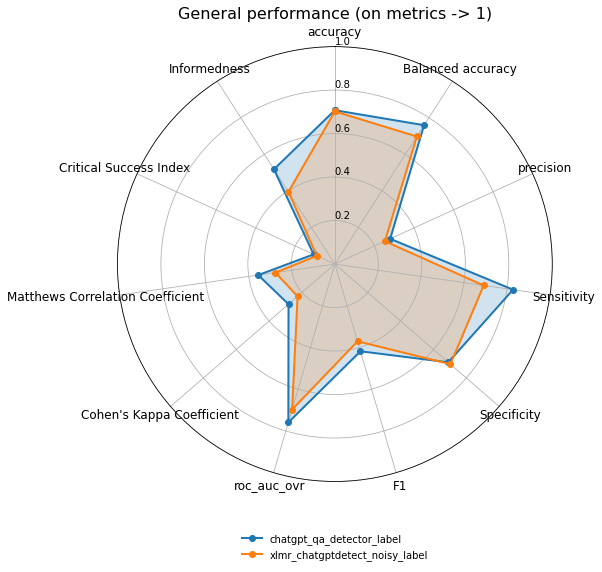

In [30]:
dftmp = df_rs[df_rs.group.isna()][ ["detector"] + metrics_tend_to_1 ]
dftmp.rename(metric_titles, axis=1, inplace=True)
display(dftmp.head())

fig = plt.figure(figsize=(16, 8))
make_chart_radar(dftmp, series_column="detector", ylim=(0.0,1.0), color_or_color_map=COLOR_PALETTE_MODELS, fig=fig)
plt.title("General performance (on metrics -> 1)", fontsize=16, x = 0.5, y = 1.05)
plt.show()

### General performance by metric

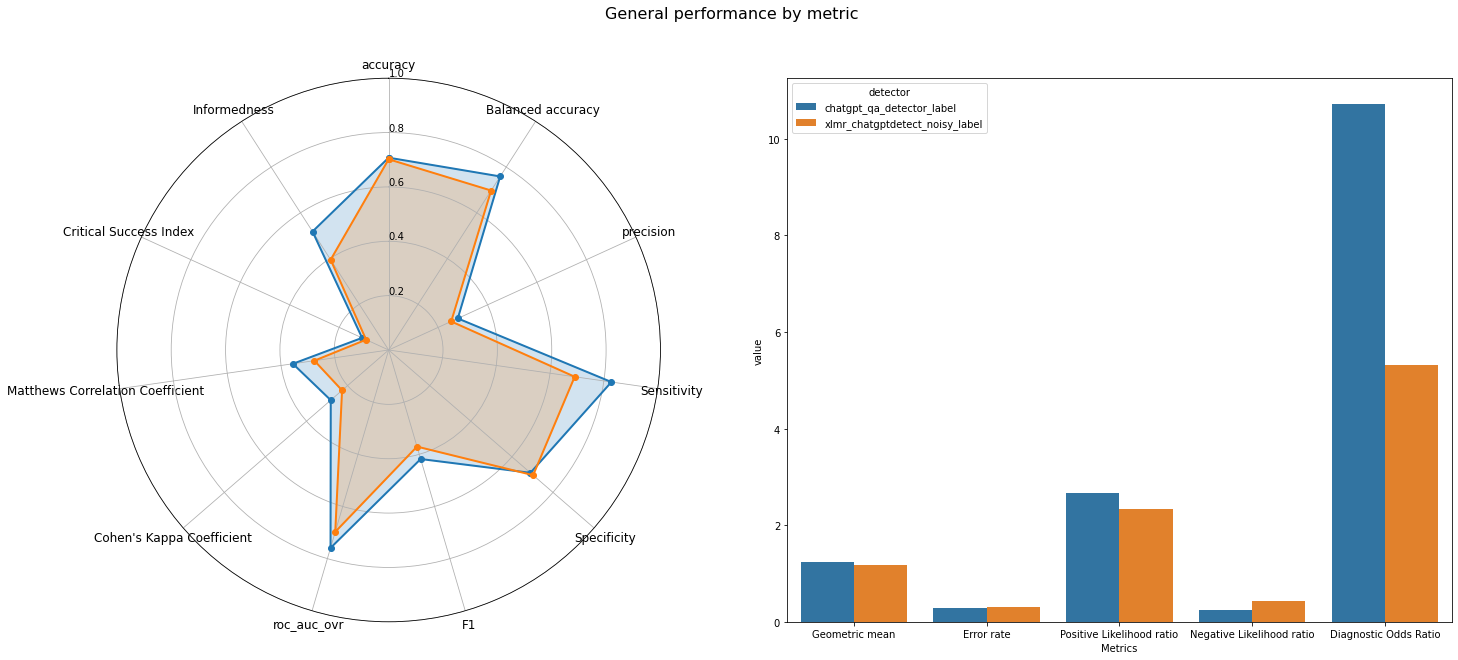

In [31]:
# create plots area
fig = plt.figure(figsize=(25, 10))
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1,1], wspace=0.1, hspace=0)

dftmp = df_rs[df_rs.group.isna()][ ["detector"] + metrics_tend_to_1 ]
dftmp.rename(metric_titles, axis=1, inplace=True)
# display(dftmp.head())
make_chart_radar(dftmp, series_column="detector", ylim=(0.0,1.0), color_or_color_map=COLOR_PALETTE_MODELS, fig=fig, subplot_specs=gs[0,0], plot_legend=False)
# plt.title("General performance (on metrics -> 1)", fontsize=16, x = 0.5, y = 1.05)

ax = fig.add_subplot(gs[0, 1])
dftmp = df_rs[df_rs.group.isna()].head()[["detector"]+["gmean", "error_rate", "posLr", "negLr", "dor"]].melt(id_vars=["detector"])
# dftmp.rename({"variable":"metric"}, axis=1, inplace=True)
dftmp.variable = dftmp.variable.map(metric_titles)
# display(dftmp)
sns.barplot(data=dftmp, x="variable", y="value", hue="detector", palette=COLOR_PALETTE_MODELS)
# plt.xticks(rotation=45)
plt.xlabel("Metrics")
# plt.ylabel("Counts")
fig.suptitle('General performance by metric', fontsize=16)
plt.show()

#### Radar positive metrics by task

In [32]:
df_rs.head().group.values

array([nan, 'category:closed_qa',
       'category:closed_qa|emotion_top1_label:neutral',
       'category:closed_qa|emotion_top1_label:approval',
       'category:closed_qa|emotion_top1_label:joy'], dtype=object)

In [33]:
df_rs[(~df_rs.group.isna())].group.str.contains('\|').unique()
# df_rs[(~df_rs.group.isna()) & (df_rs.group.str.contains('|'))]

array([False,  True])

Text(0.5, 0.98, 'Performance by task (on metrics -> 1)')

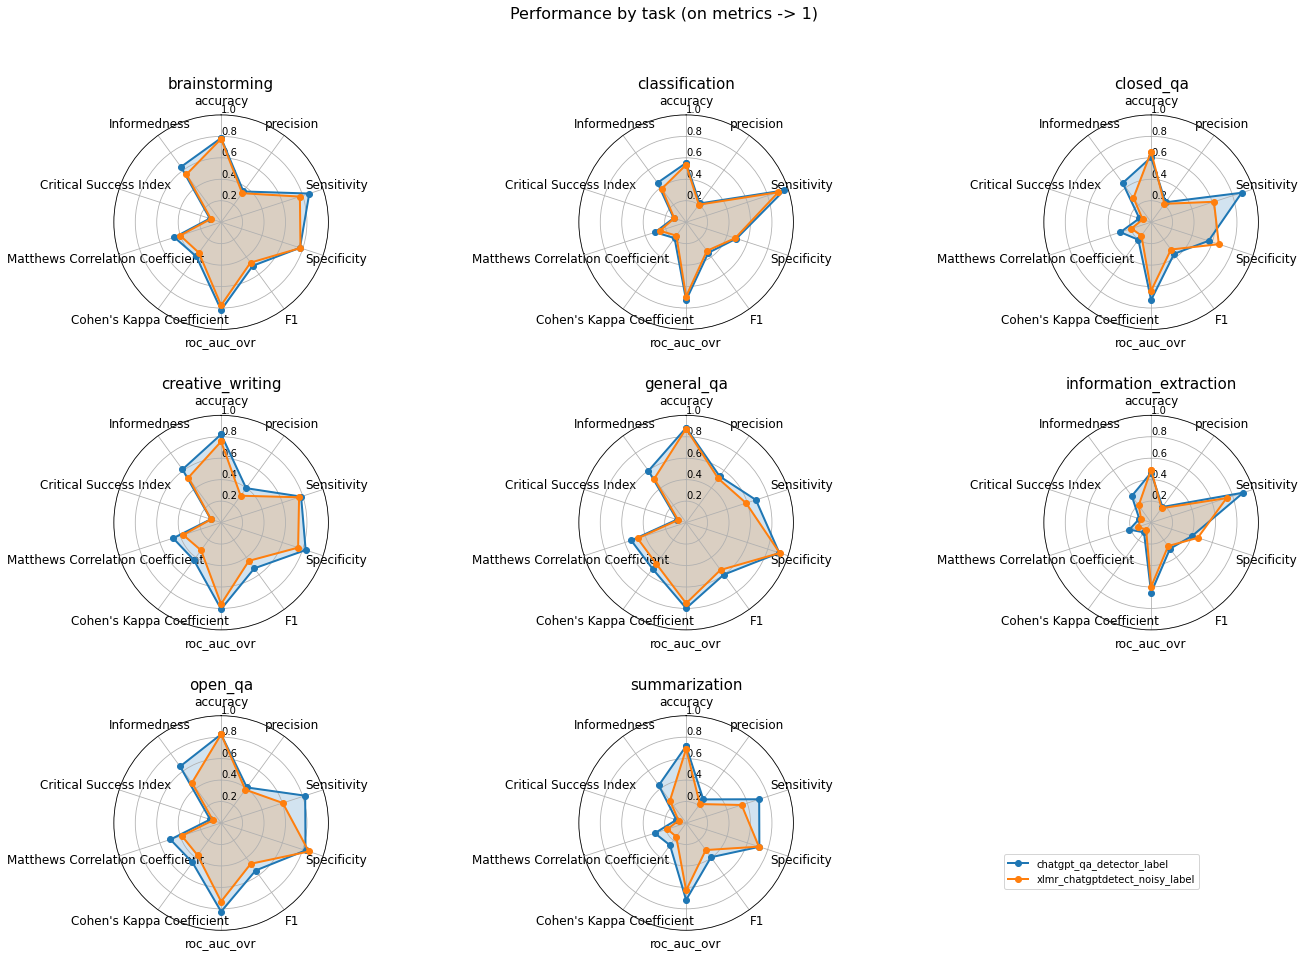

In [34]:
metrics_tend_to_1 = ["accuracy", "precision", "tpr", "tnr", "f1", "roc_auc_ovr", "khat", "mcc", "csi", "bmi"]

df_rs_filtered = df_rs[(~df_rs.group.isna()) & (df_rs.group.str.contains('\|')==False)] # only results without subgroups
# create plots area
fig = plt.figure(figsize=(25, 15))
n_figs = len(df_rs_filtered.group.unique())
n_cols = 3
gs = plt.GridSpec(nrows=math.ceil(n_figs/n_cols), ncols=n_cols, width_ratios=[1]*n_cols, wspace=0.0, hspace=0.4)

for i, (grp, dfi) in enumerate(df_rs_filtered.groupby(by=["group"])):
    dftmp = dfi[ ["detector"] + metrics_tend_to_1 ].copy()
    dftmp.rename(metric_titles, axis=1, inplace=True)
    chart_rs = make_chart_radar(dftmp, series_column="detector", ylim=(0.0,1.0), color_or_color_map=COLOR_PALETTE_MODELS, 
                     fig=fig, subplot_specs=gs[int(i/n_cols), (i%n_cols)], plot_legend= False )#((i+1)==n_figs))
    chart_rs['ax'].set_title(grp.split(":")[1], fontsize=15)    

fig.legend(chart_rs['legend_handles'], chart_rs['legend_labels'], bbox_to_anchor=(0.8, 0.2))#, loc='lower right')

fig.suptitle('Performance by task (on metrics -> 1)', fontsize=16)
# plt.subplots_adjust(top=0.85)

### Radar 1 metric all tasks

In [35]:
# _metric = "f1"
df_rs[~df_rs.group.isna()][["detector", "group", "f1"]].pivot_table(index="detector", columns="group", values="f1").reset_index()

group,detector,category:brainstorming,category:brainstorming|convincingness_top1_label:convincing,category:brainstorming|convincingness_top1_label:non_convincing,category:brainstorming|emotion_top1_label:admiration,category:brainstorming|emotion_top1_label:amusement,category:brainstorming|emotion_top1_label:anger,category:brainstorming|emotion_top1_label:annoyance,category:brainstorming|emotion_top1_label:approval,category:brainstorming|emotion_top1_label:caring,category:brainstorming|emotion_top1_label:confusion,category:brainstorming|emotion_top1_label:curiosity,category:brainstorming|emotion_top1_label:desire,category:brainstorming|emotion_top1_label:disappointment,category:brainstorming|emotion_top1_label:disapproval,category:brainstorming|emotion_top1_label:disgust,category:brainstorming|emotion_top1_label:excitement,category:brainstorming|emotion_top1_label:fear,category:brainstorming|emotion_top1_label:gratitude,category:brainstorming|emotion_top1_label:joy,category:brainstorming|emotion_top1_label:love,category:brainstorming|emotion_top1_label:nervousness,category:brainstorming|emotion_top1_label:neutral,category:brainstorming|emotion_top1_label:optimism,category:brainstorming|emotion_top1_label:realization,...,category:summarization|emotion_top1_label:annoyance,category:summarization|emotion_top1_label:approval,category:summarization|emotion_top1_label:caring,category:summarization|emotion_top1_label:confusion,category:summarization|emotion_top1_label:curiosity,category:summarization|emotion_top1_label:desire,category:summarization|emotion_top1_label:disappointment,category:summarization|emotion_top1_label:disapproval,category:summarization|emotion_top1_label:disgust,category:summarization|emotion_top1_label:excitement,category:summarization|emotion_top1_label:fear,category:summarization|emotion_top1_label:gratitude,category:summarization|emotion_top1_label:joy,category:summarization|emotion_top1_label:love,category:summarization|emotion_top1_label:nervousness,category:summarization|emotion_top1_label:neutral,category:summarization|emotion_top1_label:optimism,category:summarization|emotion_top1_label:realization,category:summarization|emotion_top1_label:remorse,category:summarization|emotion_top1_label:sadness,category:summarization|emotion_top1_label:surprise,category:summarization|irony_top1_label:irony,category:summarization|irony_top1_label:non_irony,category:summarization|persuasiveness_top1_label:non_persuasive,category:summarization|persuasiveness_top1_label:persuasive
0,chatgpt_qa_detector_label,0.502326,0.525050,0.470914,0.692308,0.0,0.0,0.0,0.5,0.545455,0.5,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.800000,0.0,0.509138,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.4,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.398104,0.0,0.0,0.333333,0.0,0.0,0.523810,0.355301,0.400452,0.166667
1,xlmr_chatgptdetect_noisy_label,0.466184,0.493562,0.430939,0.518519,0.0,0.0,0.0,0.4,0.400000,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.571429,0.0,0.485517,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.313823,0.0,0.0,0.400000,0.0,0.0,0.397959,0.286558,0.315665,0.166667


/tmp/ipykernel_29052/2584530989.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp = df_rs_filtered[~df_rs.group.isna()][["detector", "group", "f1"]].pivot_table(index="detector", columns="group", values="f1").reset_index()


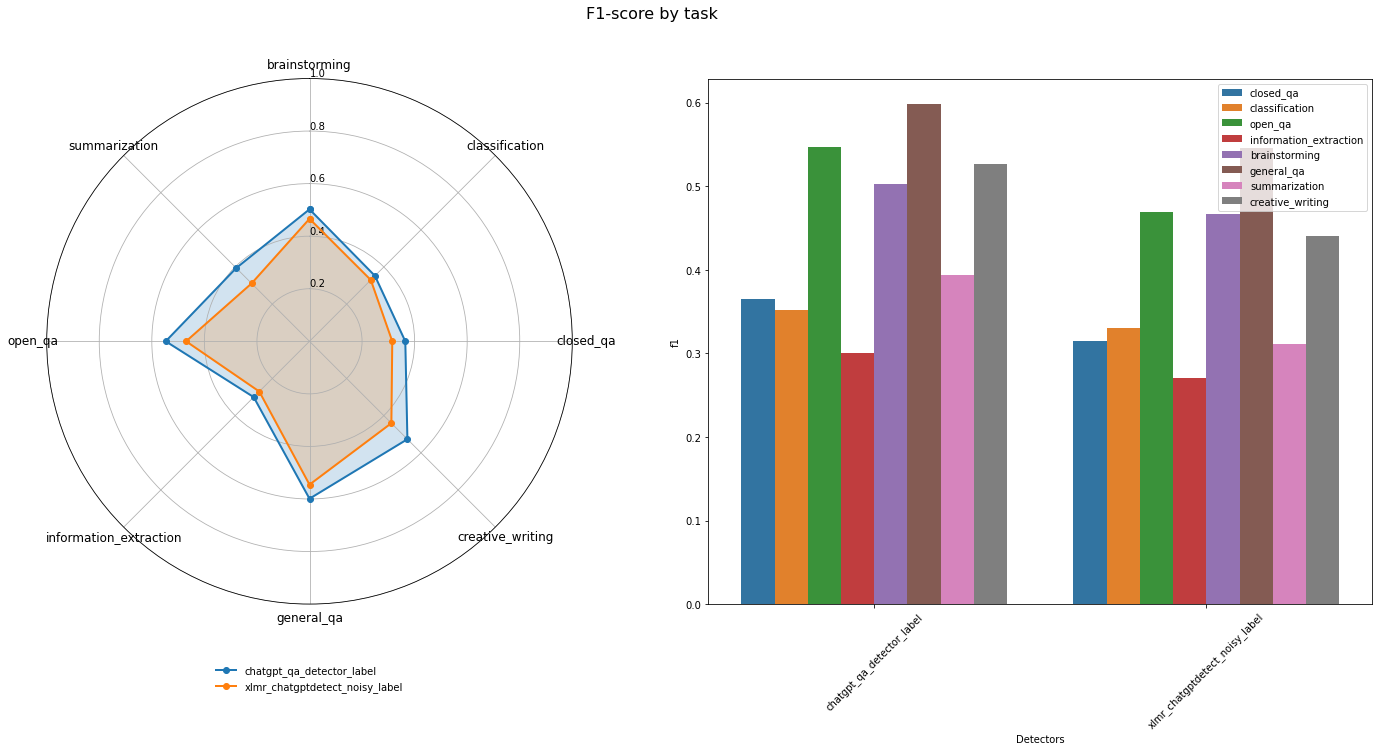

In [36]:
df_rs_filtered = df_rs[(~df_rs.group.isna()) & (df_rs.group.str.contains('\|')==False)] # only results without subgroups
dftmp = df_rs_filtered[~df_rs.group.isna()][["detector", "group", "f1"]].pivot_table(index="detector", columns="group", values="f1").reset_index()

dftmp.rename({c:c.split(":")[1] for c in dftmp.columns if c.startswith("category:")}, axis=1, inplace=True)
# display(dftmp.head())

# create plots area
fig = plt.figure(figsize=(25, 10))
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1,1], wspace=0.1, hspace=0)

make_chart_radar(dftmp, series_column="detector", ylim=(0.0,1.0), color_or_color_map=COLOR_PALETTE_MODELS, fig=fig, subplot_specs=gs[0,0])
# plt.title("F1-score by task", fontsize=16, x = 0.5, y = 1.1)

ax = fig.add_subplot(gs[0, 1])
sns.barplot(data=df_rs_filtered, x="detector", y="f1", hue="group")
plt.xticks(rotation=45)
plt.xlabel("Detectors")
for lg in plt.legend().get_texts():
    lg.set_text(lg.get_text().split(":")[1])
# plt.ylabel("Counts")


fig.suptitle('F1-score by task', fontsize=16)
plt.subplots_adjust(bottom=0.15)
plt.show()

## Performance detector vs generator

In [184]:
def evaluate_detector_vs_generator(df):
    rss = []
    # detector = 'detector_chatgpt_qa_detector_label'
    for detector in [c for c in df.columns if c.startswith('detector_')]:
        for gen in df.model_generator.unique(): 
            if gen !='human':
                # print(f"\n\n{gen}\n\n")
                dftmp = df.query(f"model_generator=='human' or model_generator=='{gen}'") 
                rs = evaluate_detector(dftmp, prediction_column=detector)
                rss.append({**{'detector': detector, 'group': gen} ,**rs})
    return pd.DataFrame.from_records(rss)

df_rs = evaluate_detector_vs_generator(df)
df_rs

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,detector_chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,0.715424,0.8280,0.749491,0.712148,1127,763,344,1656,0.8280,0.596296,0.403704,0.1720,3890,2000,0.684580,0.284576,0.426899,0.437311,0.467005,1.193439,0.712148,2.051009,0.288447,7.110518,0.424296
1,detector_chatgpt_qa_detector_label,openai_openai/gpt-4-1106-preview,0.780750,0.8280,0.790642,0.780750,1467,533,344,1656,0.8280,0.733500,0.266500,0.1720,4000,2000,0.756510,0.219250,0.561500,0.564024,0.452954,1.249600,0.780750,3.106942,0.234492,13.249662,0.561500
2,detector_chatgpt_qa_detector_label,openai_openai/gpt-3.5-turbo-1106,0.750500,0.8280,0.768445,0.750500,1346,654,344,1656,0.8280,0.673000,0.327000,0.1720,4000,2000,0.716883,0.249500,0.501000,0.507129,0.452954,1.225153,0.750500,2.532110,0.255572,9.907617,0.501000
3,detector_chatgpt_qa_detector_label,hf_model_meta-llama/Llama-2-7b-chat-hf,0.753061,0.8280,0.773832,0.751500,1296,624,344,1656,0.8280,0.675000,0.325000,0.1720,3920,2000,0.726316,0.246939,0.504471,0.509735,0.463087,1.225969,0.751500,2.547692,0.254815,9.998211,0.503000
4,detector_chatgpt_qa_detector_label,hf_model_tiiuae/falcon-7b-instruct,0.643867,0.8280,0.701249,0.642084,895,1067,344,1656,0.8280,0.456167,0.543833,0.1720,3962,2000,0.608153,0.356133,0.285165,0.306464,0.457711,1.133211,0.642084,1.522527,0.377055,4.037946,0.284167
5,detector_chatgpt_qa_detector_label,hf_model_huggyllama/llama-7b_timdettmers/guana...,0.838919,0.8280,0.837209,0.838925,1698,300,344,1656,0.8280,0.849850,0.150150,0.1720,3998,2000,0.846626,0.161081,0.677842,0.678007,0.453202,1.295318,0.838925,5.514480,0.202389,27.246977,0.677850
6,detector_chatgpt_qa_detector_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,0.832583,0.8280,0.831952,0.832587,1671,325,344,1656,0.8280,0.837174,0.162826,0.1720,3996,2000,0.835941,0.167417,0.665168,0.665198,0.453450,1.290416,0.832587,5.085194,0.205453,24.751127,0.665174
7,detector_chatgpt_qa_detector_label,NaN,0.828000,0.8280,0.905908,NaN,0,0,344,1656,0.8280,NaN,NaN,0.1720,2000,2000,1.000000,0.172000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,detector_xlmr_chatgptdetect_noisy_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,0.628535,0.6915,0.656851,0.626702,1062,828,617,1383,0.6915,0.561905,0.438095,0.3085,3890,2000,0.625509,0.371465,0.254185,0.255706,0.422548,1.119556,0.626702,1.578424,0.549025,2.874956,0.253405
9,detector_xlmr_chatgptdetect_noisy_label,openai_openai/gpt-4-1106-preview,0.717000,0.6915,0.709595,0.717000,1485,515,617,1383,0.6915,0.742500,0.257500,0.3085,4000,2000,0.728662,0.283000,0.434000,0.434566,0.408809,1.197497,0.717000,2.685437,0.415488,6.463329,0.434000


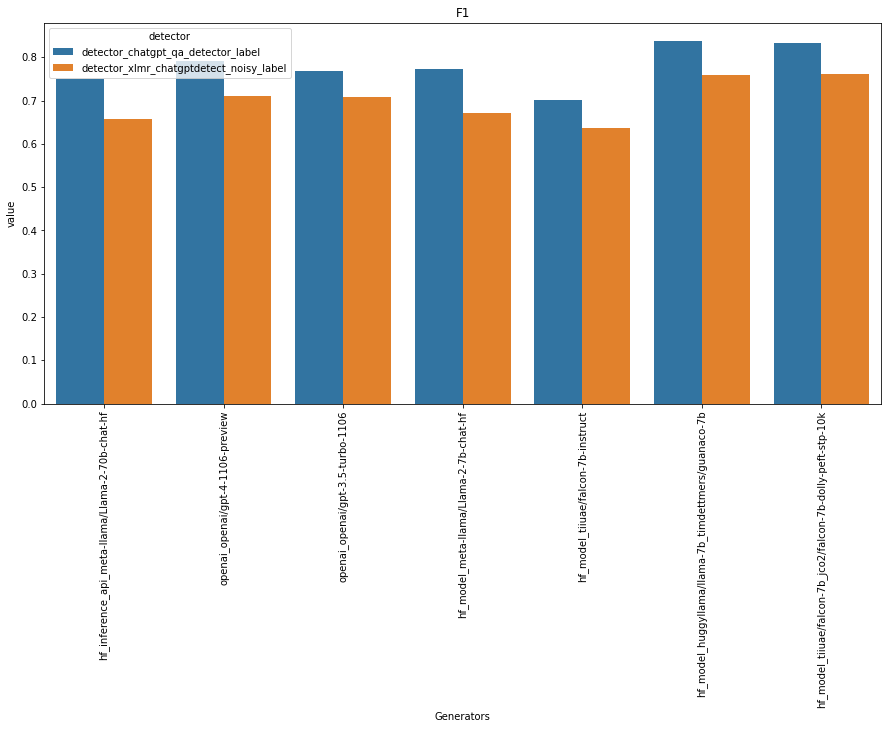

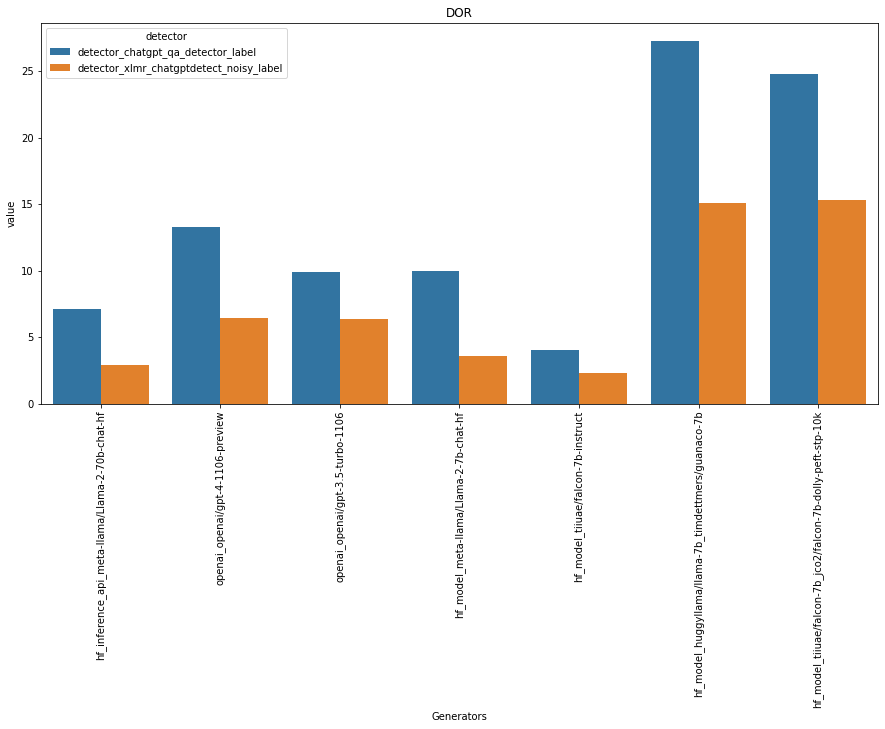

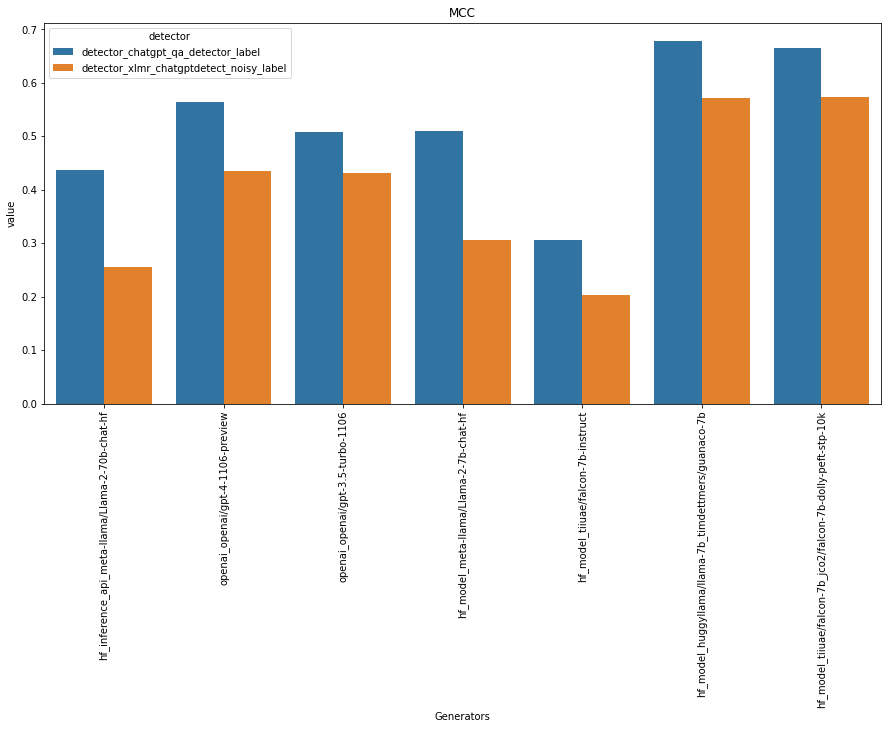

In [186]:
# dftmp = df_rs[~df_rs.group.isna()][["detector"]+["gmean", "error_rate", "posLr", "negLr", "dor"]].melt(id_vars=["detector"])
for m in ["f1", "dor", "mcc"]:
    dftmp = df_rs[~df_rs.group.isna()][["detector", "group"]+[m]].melt(id_vars=["detector", "group"])
    # display(dftmp)
    fig = plt.figure(figsize=(15, 7))
    # sns.barplot(data=dftmp, x="variable", y="value", hue="detector")#, palette=COLOR_PALETTE_MODELS)
    sns.barplot(data=dftmp, x="group", y="value", hue="detector")#, palette=COLOR_PALETTE_MODELS)
    plt.xticks(rotation=90)
    plt.xlabel("Generators")
    plt.title(m.upper())
    plt.show()



In [197]:
dftmp = df_rs[["detector", "group", "mcc"]].dropna().pivot(index=["detector"], columns=["group"], values="mcc").reset_index()
print(dftmp.columns)
print(dftmp.columns[1:])
dftmp

Index(['detector', 'hf_inference_api_meta-llama/Llama-2-70b-chat-hf',
       'hf_model_huggyllama/llama-7b_timdettmers/guanaco-7b',
       'hf_model_meta-llama/Llama-2-7b-chat-hf',
       'hf_model_tiiuae/falcon-7b-instruct',
       'hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly-peft-stp-10k',
       'openai_openai/gpt-3.5-turbo-1106', 'openai_openai/gpt-4-1106-preview'],
      dtype='object', name='group')
Index(['hf_inference_api_meta-llama/Llama-2-70b-chat-hf',
       'hf_model_huggyllama/llama-7b_timdettmers/guanaco-7b',
       'hf_model_meta-llama/Llama-2-7b-chat-hf',
       'hf_model_tiiuae/falcon-7b-instruct',
       'hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly-peft-stp-10k',
       'openai_openai/gpt-3.5-turbo-1106', 'openai_openai/gpt-4-1106-preview'],
      dtype='object', name='group')


group,detector,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,hf_model_huggyllama/llama-7b_timdettmers/guanaco-7b,hf_model_meta-llama/Llama-2-7b-chat-hf,hf_model_tiiuae/falcon-7b-instruct,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly-peft-stp-10k,openai_openai/gpt-3.5-turbo-1106,openai_openai/gpt-4-1106-preview
0,detector_chatgpt_qa_detector_label,0.437311,0.678007,0.509735,0.306464,0.665198,0.507129,0.564024
1,detector_xlmr_chatgptdetect_noisy_label,0.255706,0.571051,0.306574,0.203163,0.573124,0.431497,0.434566


In [200]:
from functools import partial

In [217]:
tmp = pd.crosstab(dftmp["detector"], dftmp["hf_inference_api_meta-llama/Llama-2-70b-chat-hf"])
print(tmp.columns)
tmp

Float64Index([0.25570601983465, 0.4373114718279774], dtype='float64', name='hf_inference_api_meta-llama/Llama-2-70b-chat-hf')


hf_inference_api_meta-llama/Llama-2-70b-chat-hf,0.255706,0.437311
detector,,
detector_chatgpt_qa_detector_label,0,1
detector_xlmr_chatgptdetect_noisy_label,1,0


In [215]:
dftmp["hf_inference_api_meta-llama/Llama-2-70b-chat-hf"].values

array([0.43731147, 0.25570602])

In [233]:
from itertools import product
from scipy import stats

stats.ttest_rel

def compute_significance(df, vars1_col, vars2_cols, value_col, metric):
    rs = []
    _vars1 = list(df[vars1_col].unique())
    _vars2 = vars2_cols
    for i in list(product(_vars1,_vars2, repeat = 1)):
        if i[0] != i[1]:
            print(f"-------- {i[0]} - {i[1]} -------------")
            # _val = df.query(f"{vars1_col} == '{i[0]}' and {vars2_col} == '{i[1]}'")
            _val = df[i[1]]
            display(_val)
            _val = _val.values
            print(_val)
            print(stats.ttest_rel(a=[_val[0]], b=[_val[1]]))
            print("@---------------")
            rs.append((i[0],i[1],
                           list(metric(pd.crosstab(df[i[0]], df[i[1]])))[1]))
            
    rs = pd.DataFrame(rs, columns = ['var1', 'var2','coeff'])
    rs = rs.pivot(index='var1', columns='var2', values='coeff') # -> into a crosstab
    return rs

rs = compute_significance(dftmp, "detector", dftmp.columns[1:], "mcc", partial(stats.ttest_rel))
rs

-------- detector_chatgpt_qa_detector_label - hf_inference_api_meta-llama/Llama-2-70b-chat-hf -------------


0    0.437311
1    0.255706
Name: hf_inference_api_meta-llama/Llama-2-70b-chat-hf, dtype: float64

[0.43731147 0.25570602]
Ttest_relResult(statistic=nan, pvalue=nan)
@---------------


KeyError: 'detector_chatgpt_qa_detector_label'

In [251]:
(stats.wilcoxon ([0.43731147], [0.25570602]))#, nan_policy="raise"))

/home/owlmx/miniconda3/envs/misinfofastcatch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Ttest_indResult(statistic=nan, pvalue=nan)

## Misc

In [117]:
len(df_rs.group.unique())

217

In [135]:
df_rs

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,radar_vicuna_7B_label,None,0.835625,0.119000,0.153252,0.528500,6566,434,881,119,0.119000,0.938000,0.062000,0.881000,8000,1000,0.215190,0.164375,0.070507,0.074314,0.016716,1.028105,0.528500,1.919355,0.939232,2.043536,0.057000
1,radar_vicuna_7B_label,category:brainstorming,0.814076,0.100840,0.119403,0.508403,763,70,107,12,0.100840,0.915966,0.084034,0.899160,952,119,0.146341,0.185924,0.019391,0.019811,0.014201,1.008368,0.508403,1.200000,0.981651,1.222430,0.016807
2,radar_vicuna_7B_label,category:brainstorming|model:Human,0.100840,0.100840,0.183206,NaN,0,0,107,12,0.100840,NaN,NaN,0.899160,119,119,1.000000,0.899160,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,radar_vicuna_7B_label,category:brainstorming|model:LLM,0.915966,0.000000,0.000000,NaN,763,70,0,0,NaN,0.915966,0.084034,NaN,833,0,0.000000,0.084034,0.000000,NaN,0.000000,0.957061,0.457983,NaN,NaN,NaN,NaN
4,radar_vicuna_7B_label,category:closed_qa,0.821138,0.056911,0.073684,0.493612,801,60,116,7,0.056911,0.930314,0.069686,0.943089,984,123,0.104478,0.178862,-0.015873,-0.016773,0.008065,0.993592,0.493612,0.816667,1.013733,0.805603,-0.012776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,xlmr_chatgptdetect_noisy_label,category:classification|model:Human,0.843537,0.843537,0.915129,NaN,0,0,23,124,0.843537,NaN,NaN,0.156463,147,147,1.000000,0.156463,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
71,xlmr_chatgptdetect_noisy_label,category:classification|model:LLM,0.397219,0.000000,0.000000,NaN,400,607,0,0,NaN,0.397219,0.602781,NaN,1007,0,0.000000,0.602781,0.000000,NaN,0.000000,0.630253,0.198610,NaN,NaN,NaN,NaN
72,xlmr_chatgptdetect_noisy_label,category:creative_writing,0.734824,0.564103,0.346457,0.661613,208,66,17,22,0.564103,0.759124,0.240876,0.435897,313,39,0.250000,0.265176,0.210053,0.237455,0.074324,1.150316,0.661613,2.341880,0.574211,4.078431,0.323227
73,xlmr_chatgptdetect_noisy_label,category:creative_writing|model:Human,0.564103,0.564103,0.721311,NaN,0,0,17,22,0.564103,NaN,NaN,0.435897,39,39,1.000000,0.435897,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dftmp =df_rs[(~df_rs.group.isna()) & (df_rs.group.str.contains("\|"))].copy()
dftmp["grp1"] = dftmp.group.map(lambda v: v.split("|")[0])
dftmp["grp2"] = dftmp.group.map(lambda v: v.split("|")[1])
display(dftmp)


,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi,grp1,grp2
2,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:neutral,0.596402,0.891213,0.372378,0.720931,848,692,26,213,0.891213,0.550649,0.449351,0.108787,1779,239,0.235359,0.403598,0.202962,0.301416,0.121506,1.200776,0.720931,1.983336,0.197561,10.039129,0.441863,category:closed_qa,emotion_top1_label:neutral
3,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:approval,0.600000,0.666667,0.285714,0.628788,13,9,1,2,0.666667,0.590909,0.409091,0.333333,25,3,0.181818,0.400000,0.119718,0.168623,0.083333,1.121417,0.628788,1.629630,0.564103,2.888889,0.257576,category:closed_qa,emotion_top1_label:approval
4,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:joy,1.000000,1.000000,1.000000,1.000000,2,0,0,1,1.000000,1.000000,0.000000,0.000000,3,1,1.000000,0.000000,1.000000,1.000000,0.333333,1.414214,1.000000,inf,0.000000,inf,1.000000,category:closed_qa,emotion_top1_label:joy
5,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:sadness,0.437500,0.500000,0.181818,0.464286,6,8,1,1,0.500000,0.428571,0.571429,0.500000,16,2,0.111111,0.562500,-0.028571,-0.047619,0.066667,0.963624,0.464286,0.875000,1.166667,0.750000,-0.071429,category:closed_qa,emotion_top1_label:sadness
6,chatgpt_qa_detector_label,category:closed_qa|emotion_top1_label:disapproval,0.700000,1.000000,0.400000,0.833333,6,3,0,1,1.000000,0.666667,0.333333,0.000000,10,1,0.250000,0.300000,0.285714,0.408248,0.100000,1.290994,0.833333,3.000000,0.000000,inf,0.666667,category:closed_qa,emotion_top1_label:disapproval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,xlmr_chatgptdetect_noisy_label,category:creative_writing|irony_top1_label:irony,0.813397,0.677419,0.682927,0.774084,128,19,20,42,0.677419,0.870748,0.129252,0.322581,209,62,0.688525,0.186603,0.550736,0.550772,0.222222,1.244254,0.774084,5.241087,0.370464,14.147368,0.548168,category:creative_writing,irony_top1_label:irony
494,xlmr_chatgptdetect_noisy_label,category:creative_writing|convincingness_top1_...,0.800000,0.730994,0.469043,0.770240,1007,237,46,125,0.730994,0.809486,0.190514,0.269006,1415,171,0.345304,0.200000,0.364767,0.403756,0.091308,1.241161,0.770240,3.836948,0.332317,11.546047,0.540480,category:creative_writing,convincingness_top1_label:convincing
495,xlmr_chatgptdetect_noisy_label,category:creative_writing|convincingness_top1_...,0.647469,0.835443,0.395210,0.726426,305,189,13,66,0.835443,0.617409,0.382591,0.164557,573,79,0.258824,0.352531,0.233937,0.314159,0.117857,1.205343,0.726426,2.183645,0.266528,8.192918,0.452852,category:creative_writing,convincingness_top1_label:non_convincing
496,xlmr_chatgptdetect_noisy_label,category:creative_writing|persuasiveness_top1_...,0.762123,0.753695,0.457399,0.758556,1010,313,50,153,0.753695,0.763416,0.236584,0.246305,1526,203,0.328326,0.237877,0.333967,0.381299,0.103659,1.231711,0.758556,3.185744,0.322636,9.874121,0.517111,category:creative_writing,persuasiveness_top1_label:non_persuasive


In [162]:
dftmp.samples

2      119
3      833
5      123
6      861
8      144
      ... 
68     552
70     147
71    1007
73      39
74     274
Name: samples, Length: 48, dtype: int64

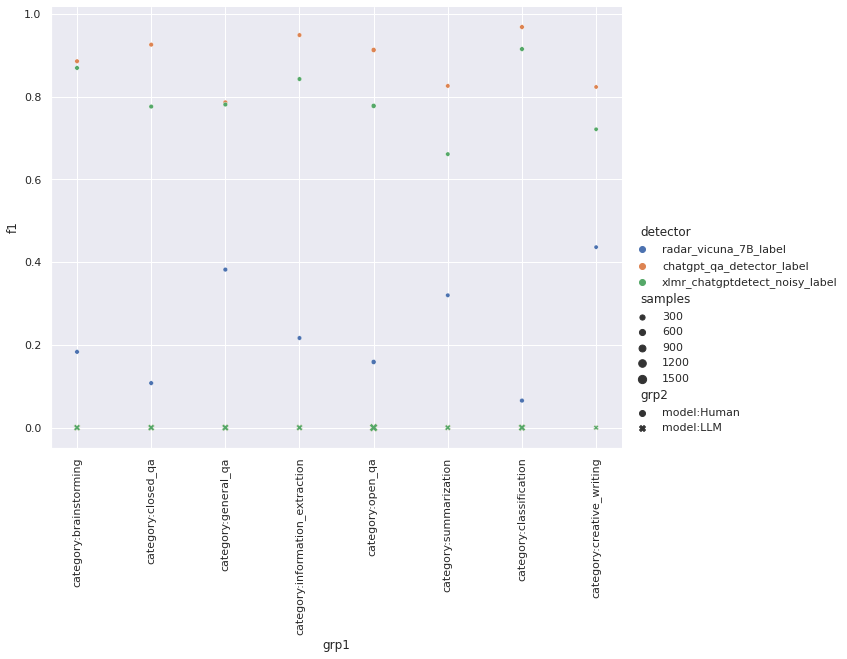

In [161]:
# plt.figure(figsize=(25, 15))
# sns.set(rc={'figure.figsize':(24,14)})
# sns.scatterplot(data=dftmp, y="group", x="f1", hue="detector")
sns.relplot(data=dftmp, x="grp1", y="f1", hue="detector", style="grp2", size="samples",  height=7, aspect=1.3)
plt.xticks(rotation=90)

plt.show()

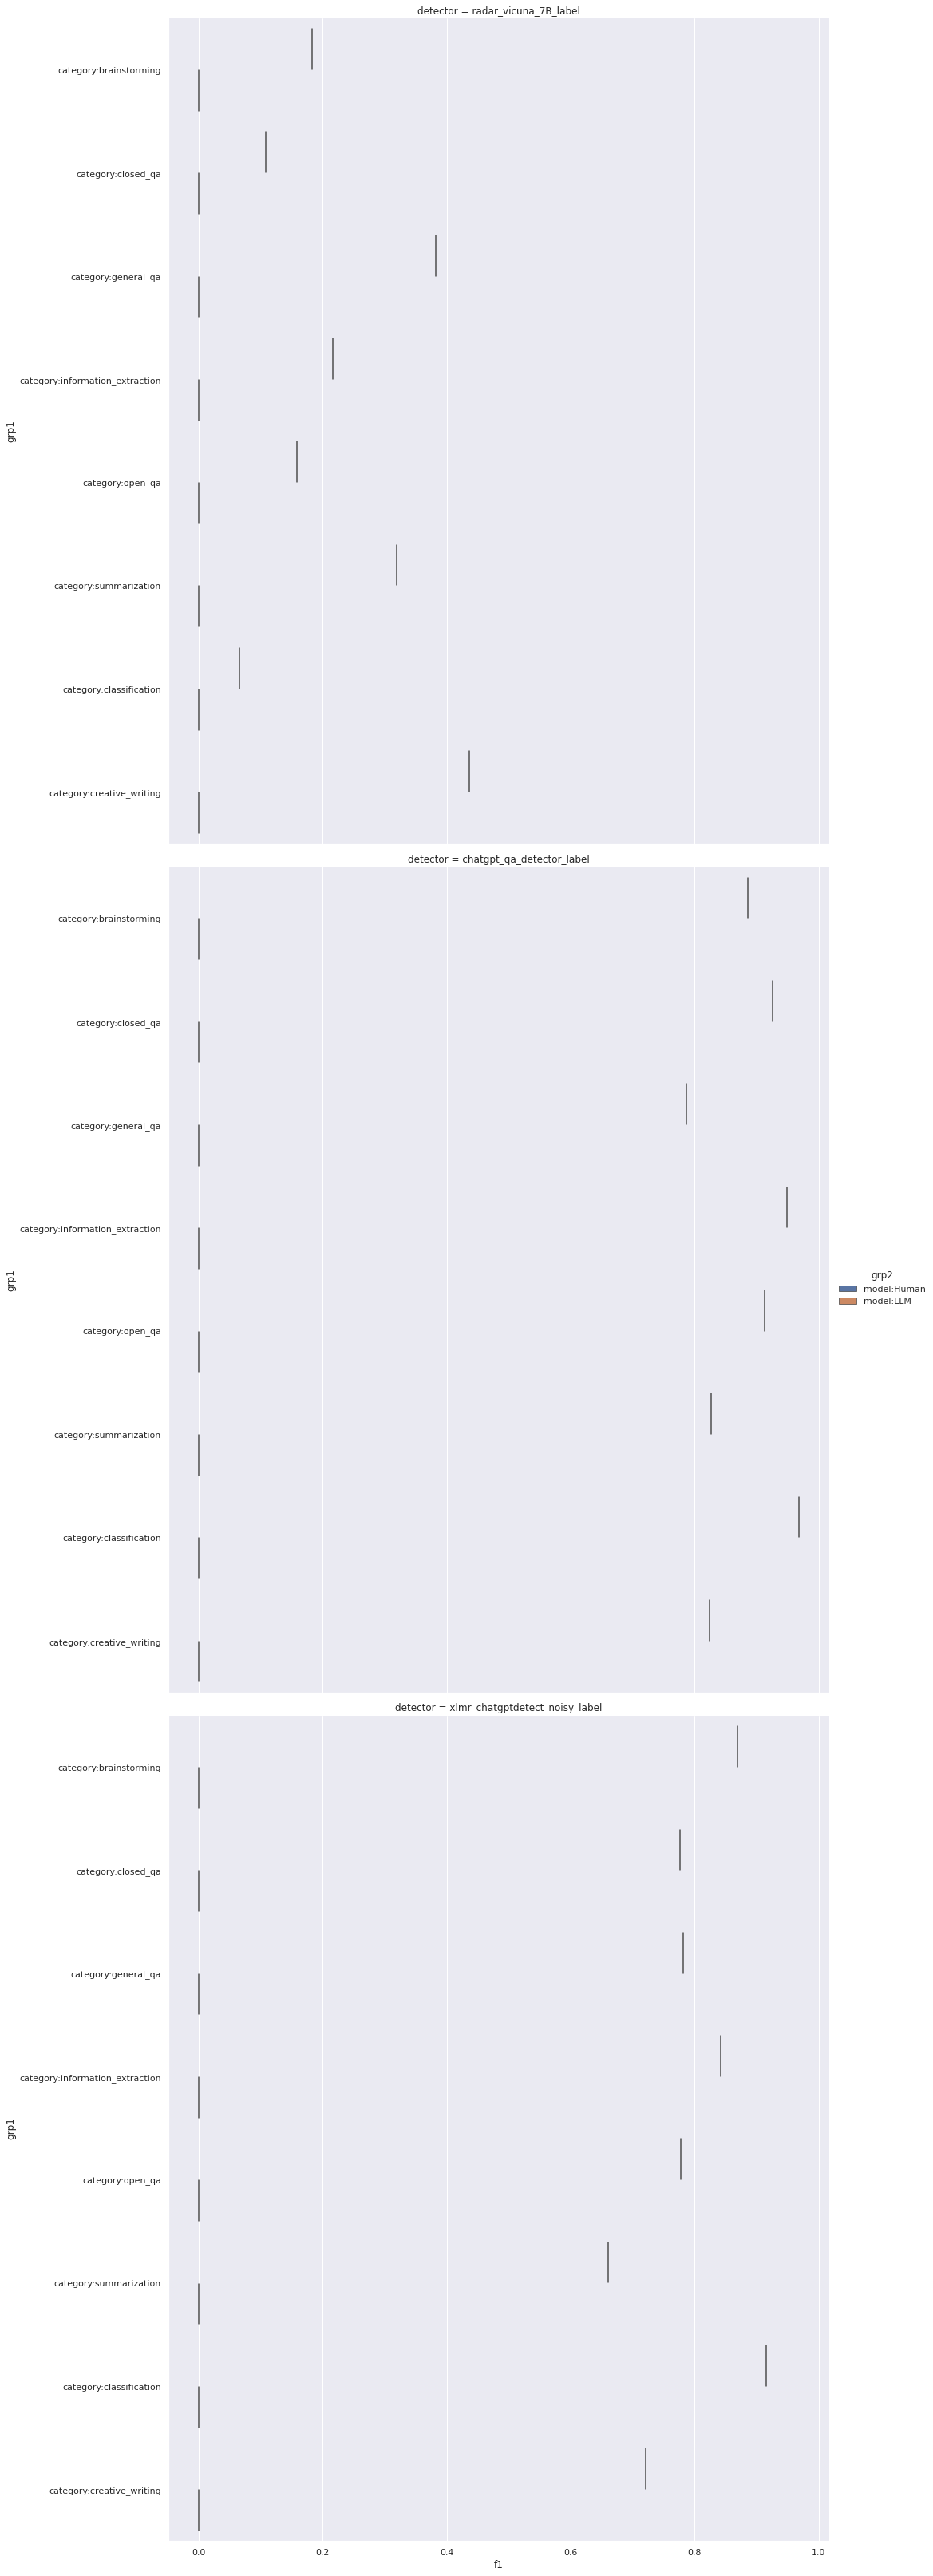

In [168]:
sns.catplot(data=dftmp, x="f1", y="grp1", hue="grp2", row="detector", kind="boxen", height=15)

# Misc

In [ ]:
from src.step_evaluate_detectors import EvaluateDetectors

In [46]:
evaluator = EvaluateDetectors(DATA_PATH, DATA_PATH_WATTI)
print(evaluator.ds.columns)
df = evaluator.ds
df

/home/owlmx/idsia/misinfodag/notebooks
Index(['data_id', 'id', 'category', 'model',
       'detector_chatgpt_qa_detector_label',
       'detector_xlmr_chatgptdetect_noisy_label', 'detector_llm_det_label',
       'detector_radar_vicuna_7B_label', 'emotion_top1_label',
       'irony_top1_label', 'convincingness_top1_label',
       'persuasiveness_top1_label', 'model_det'],
      dtype='object')


,data_id,id,category,model,detector_chatgpt_qa_detector_label,detector_xlmr_chatgptdetect_noisy_label,detector_llm_det_label,detector_radar_vicuna_7B_label,emotion_top1_label,irony_top1_label,convincingness_top1_label,persuasiveness_top1_label,model_det
0,bdecc6e7d8d24f4ba94f863ed20c6410,7398f0cf4e344d99a592b3e47a43cded,closed_qa,Human,Human,Human,LLM,LLM,neutral,non_irony,convincing,non_persuasive,human
1,7d5e10b1739b46aea06e749aa8640af5,1f4e3da890ca455eab7ebc2d193ef857,closed_qa,Human,Human,Human,Human,LLM,neutral,non_irony,convincing,non_persuasive,human
2,2c74f0f6a8594d358d17e76b6d1a46fe,5d592187183e436a8233da809eb517d1,closed_qa,Human,LLM,LLM,LLM,LLM,neutral,non_irony,convincing,non_persuasive,human
3,9acb5f501fb9479fbf5e559a5084741f,aaeeb470c44d4333843fbdfea92ba973,closed_qa,Human,Human,Human,LLM,LLM,neutral,irony,non_convincing,non_persuasive,human
4,1451afe6a68e4fe29817b012aa3fceda,e2abfd2550864f04bafdf6dadcf6a589,closed_qa,Human,Human,Human,Human,LLM,neutral,non_irony,convincing,non_persuasive,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,922aebb2af474ed09ef82c90e20dbbe8,bb3ee8fa761f455d97c51272569201a3,stance_generation,LLM,LLM,LLM,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...
25436,9af13a9945114e59b2daa2661df3c99e,e2583a1da98e4d289efe4730225b9a45,stance_generation,LLM,Human,Human,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...
25437,ba93f98d82274be7ba3d3ee06435eeb3,38c57cdcf16047fc902ffea56178b95f,stance_generation,LLM,LLM,LLM,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...
25438,53b64596b7774d8fb53f2c3b2bc100a5,64338a8330a54f3c84dcb4bfdd46cfae,stance_generation,LLM,LLM,LLM,LLM,LLM,NaN,NaN,NaN,NaN,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...


In [76]:
df.model_det.value_counts()

human                                                          3180
hf_inference_api_meta-llama/Llama-2-70b-chat-hf                3180
openai_openai/gpt-4-1106-preview                               3180
openai_openai/gpt-3.5-turbo-1106                               3180
hf_model_meta-llama/Llama-2-7b-chat-hf                         3180
hf_model_tiiuae/falcon-7b-instruct                             3180
hf_model_huggyllama/llama-7b_timdettmers/guanaco-7b            3180
hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly-peft-stp-10k    3180
Name: model_det, dtype: int64

In [63]:
df[df.irony_top1_label.isna()].category.value_counts()

review_generation    7184
stance_generation    2256
Name: category, dtype: int64

In [51]:
[c for c in df.columns if c.startswith("detector_")]

['detector_chatgpt_qa_detector_label',
 'detector_xlmr_chatgptdetect_noisy_label',
 'detector_llm_det_label',
 'detector_radar_vicuna_7B_label']

In [79]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning) # to avoid warnings of metrics when no enough data of all classes
    warnings.simplefilter("ignore", category=RuntimeWarning)
    np.seterr(invalid='ignore') # Suppress/hide the warning (e.g. True divide)
    # rs = evaluator.run_evaluations(groups=["category"], subgroups=["emotion_top1_label", "irony_top1_label", "convincingness_top1_label", "persuasiveness_top1_label"])   
    # rs = evaluator.run_evaluations(groups=["category"], subgroups=[c for c in df.columns if c.startswith("detector_")])   
    # rs = evaluator.run_evaluations(groups=["category"], subgroups=["irony_top1_label", "convincingness_top1_label", "persuasiveness_top1_label"])   
    rs = evaluator.run_evaluations(groups=["category"])
    # rs = evaluator.run_evaluations(groups=["model_det"])

df_rs = pd.DataFrame.from_dict(rs)
df_rs

,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,chatgpt_qa_detector_label,None,0.694310,0.884591,0.422404,0.775690,14660,7326,367,2813,0.884591,0.666788,0.333212,0.115409,25166,3180,0.277444,0.305690,0.284815,0.373511,0.113432,0.768007,0.775690,2.654740,0.173082,15.338070,0.551379
1,chatgpt_qa_detector_label,category:closed_qa,0.604497,0.888000,0.364532,0.725488,961,746,28,222,0.888000,0.562976,0.437024,0.112000,1957,250,0.229339,0.395503,0.202623,0.301096,0.115086,0.707052,0.725488,2.031925,0.198943,10.213615,0.450976
2,chatgpt_qa_detector_label,category:classification,0.552685,0.960000,0.352164,0.726810,851,873,10,240,0.960000,0.493619,0.506381,0.040000,1974,250,0.215633,0.447315,0.183228,0.304215,0.122200,0.688386,0.726810,1.895808,0.081034,23.395189,0.453619
3,chatgpt_qa_detector_label,category:open_qa,0.826816,0.824000,0.547145,0.825613,1422,297,44,206,0.824000,0.827225,0.172775,0.176000,1969,250,0.409543,0.173184,0.454636,0.497151,0.107013,0.825611,0.825613,4.769212,0.212759,22.415978,0.651225
4,chatgpt_qa_detector_label,category:information_extraction,0.466024,0.904000,0.300332,0.653220,693,1029,24,226,0.904000,0.402439,0.597561,0.096000,1972,250,0.180080,0.533976,0.112737,0.211958,0.116016,0.603162,0.653220,1.512816,0.238545,6.341837,0.306439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,radar_vicuna_7B_label,category:general_qa,0.832500,0.208000,0.236902,0.564857,1613,137,198,52,0.208000,0.921714,0.078286,0.792000,2000,250,0.275132,0.167500,0.144863,0.146652,0.028857,0.437855,0.564857,2.656934,0.859268,3.092089,0.129714
40,radar_vicuna_7B_label,category:summarization,0.736000,0.212000,0.167192,0.511429,1419,331,197,53,0.212000,0.810857,0.189143,0.788000,2000,250,0.138021,0.264000,0.018587,0.019192,0.029395,0.414610,0.511429,1.120846,0.971811,1.153358,0.022857
41,radar_vicuna_7B_label,category:creative_writing,0.859000,0.348000,0.381579,0.640000,1631,119,163,87,0.348000,0.932000,0.068000,0.652000,2000,250,0.422330,0.141000,0.302843,0.304651,0.047360,0.569505,0.640000,5.117647,0.699571,7.315410,0.280000
42,radar_vicuna_7B_label,category:review_generation,0.885301,0.170379,0.270796,0.578906,6207,79,745,153,0.170379,0.987432,0.012568,0.829621,7184,898,0.659483,0.114699,0.231343,0.295232,0.023761,0.410167,0.578906,13.556962,0.840180,16.135774,0.157811


In [80]:
df_rs.detector.value_counts()

chatgpt_qa_detector_label         11
xlmr_chatgptdetect_noisy_label    11
llm_det_label                     11
radar_vicuna_7B_label             11
Name: detector, dtype: int64

In [81]:
displayAll(df_rs.group.value_counts())

category:closed_qa                 4
category:classification            4
category:open_qa                   4
category:information_extraction    4
category:brainstorming             4
category:general_qa                4
category:summarization             4
category:creative_writing          4
category:review_generation         4
category:stance_generation         4
Name: group, dtype: int64

In [68]:
from src.utils_plots import define_color_palette, make_chart_radar

{'ax': <PolarAxesSubplot:>}

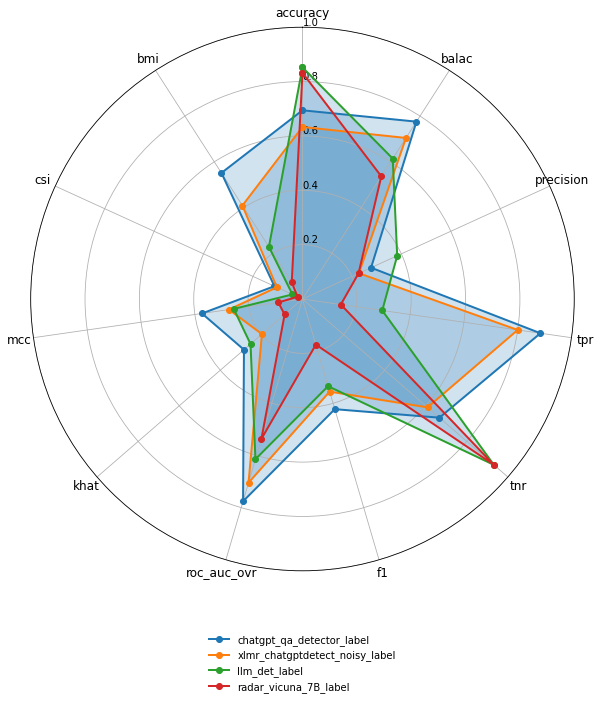

In [74]:
dftmp = df_rs[df_rs.group.isna()][ ["detector"] + evaluator.metrics_tend_to_1 ]
# dftmp.rename(self.metric_titles, axis=1, inplace=True)
# display(dftmp.head())
fig = plt.figure(figsize=(15, 10))
make_chart_radar(dftmp, series_column="detector", ylim=(0.0,1.0), color_or_color_map=evaluator.COLOR_PALETTE_MODELS, 
                    fig=fig,  plot_legend=True)

In [75]:
dftmp

,detector,accuracy,balac,precision,tpr,tnr,f1,roc_auc_ovr,khat,mcc,csi,bmi
0,chatgpt_qa_detector_label,0.694310,0.775690,0.277444,0.884591,0.666788,0.422404,0.775690,0.284815,0.373511,0.113432,0.551379
11,xlmr_chatgptdetect_noisy_label,0.632957,0.704398,0.228264,0.800000,0.608797,0.355183,0.704398,0.197370,0.273441,0.103710,0.408797
22,llm_det_label,0.852398,0.614173,0.383178,0.296541,0.931806,0.334338,0.614173,0.252848,0.255476,0.040641,0.228347
33,radar_vicuna_7B_label,0.832075,0.536523,0.226727,0.142453,0.930593,0.174971,0.536523,0.086887,0.089800,0.019945,0.073046


In [145]:
def run_evaluations_by_generator(df=None, groups=["category"], subgroups=[]):
    rs = []
    for detector_column in [c for c in df.columns if c.startswith("detector_")]:
        _detector_name = detector_column[len("detector_"):]
        rs.append({**{"detector": _detector_name, "generator": None, "group": None}, 
                **evaluator.evaluate_detector(df, prediction_column=detector_column)})
        
        col_gen = "model_det"
        for gen in df[col_gen].unique():
            if gen!='human' and gen:
                rs.append({**{"detector": _detector_name, "generator": f"{gen}", "group": None},
                                        **evaluator.evaluate_detector(df.query(f"{col_gen}=='{gen}' or {col_gen}=='human'"), prediction_column=detector_column)})            

                for grp in groups:                    
                    for gv in df[grp].unique():
                        rs.append({**{"detector": _detector_name, "generator": f"{gen}", "group": f"{grp}:{gv}"}, 
                                **evaluator.evaluate_detector(df.query(f"({col_gen}=='{gen}' or {col_gen}=='human') and {grp}=='{gv}'"), prediction_column=detector_column)})
    
    return rs

df_rs = pd.DataFrame.from_dict(run_evaluations_by_generator(df))
df_rs

/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positi

,detector,generator,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,chatgpt_qa_detector_label,None,None,0.694310,0.884591,0.422404,0.775690,14660,7326,367,2813,0.884591,0.666788,0.333212,0.115409,25166,3180,0.277444,0.305690,0.284815,0.373511,0.113432,0.768007,0.775690,2.654740,0.173082,15.338070,0.551379
1,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,None,0.745755,0.884591,0.779981,0.743079,1842,1220,367,2813,0.884591,0.601568,0.398432,0.115409,6242,3180,0.697496,0.254245,0.488685,0.508256,0.478809,0.729480,0.743079,2.220179,0.191847,11.572667,0.486159
2,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,category:closed_qa,0.597166,0.888000,0.690513,0.593590,73,171,28,222,0.888000,0.299180,0.700820,0.112000,494,250,0.564885,0.402834,0.188506,0.232043,0.476395,0.515434,0.593590,1.267088,0.374356,3.384712,0.187180
3,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,category:classification,0.630390,0.960000,0.727273,0.621350,67,170,10,240,0.960000,0.282700,0.717300,0.040000,487,250,0.585366,0.369610,0.247037,0.332489,0.503145,0.520953,0.621350,1.338353,0.141493,9.458824,0.242700
4,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,category:open_qa,0.861925,0.824000,0.861925,0.863754,206,22,44,206,0.824000,0.903509,0.096491,0.176000,478,250,0.903509,0.138075,0.724433,0.727509,0.474654,0.862839,0.863754,8.539636,0.194796,43.838843,0.727509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:general_qa,0.600000,0.208000,0.342105,0.600000,248,2,198,52,0.208000,0.992000,0.008000,0.792000,500,250,0.962963,0.400000,0.200000,0.322185,0.172185,0.454242,0.600000,26.000000,0.798387,32.565657,0.200000
308,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:summarization,0.580000,0.212000,0.335443,0.580000,237,13,197,53,0.212000,0.948000,0.052000,0.788000,500,250,0.803030,0.420000,0.160000,0.236343,0.174917,0.448303,0.580000,4.076923,0.831224,4.904725,0.160000
309,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:creative_writing,0.660000,0.348000,0.505814,0.660000,243,7,163,87,0.348000,0.972000,0.028000,0.652000,500,250,0.925532,0.340000,0.320000,0.409509,0.258160,0.581598,0.660000,12.428571,0.670782,18.528484,0.320000
310,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:review_generation,0.584633,0.170379,0.290875,0.584633,897,1,745,153,0.170379,0.998886,0.001114,0.829621,1796,898,0.993506,0.415367,0.169265,0.302271,0.145576,0.412540,0.584633,153.000000,0.830546,184.216107,0.169265


In [172]:
df_rs.group.value_counts()

category:closed_qa                 32
category:classification            32
category:open_qa                   32
category:information_extraction    32
category:brainstorming             32
category:general_qa                32
category:summarization             32
category:creative_writing          32
category:review_generation         32
category:stance_generation         32
Name: group, dtype: int64

In [169]:
df_rs = pd.concat([pd.DataFrame.from_dict(evaluator.run_evaluations(df)), pd.DataFrame.from_dict(evaluator.run_evaluations_by_generator(df))])
print(df_rs.columns)
df_rs

/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positive Likelihood Ratio -> odds of obtaining a positive prediction for actual positives
/home/owlmx/idsia/misinfodag/notebooks/../src/step_evaluate_detectors.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  rs["posLr"] = rs["tpr"]/rs["fpr"] # ->1 Positi

Index(['detector', 'generator', 'group', 'accuracy', 'recall', 'f1',
       'roc_auc_ovr', 'tn', 'fp', 'fn', 'tp', 'tpr', 'tnr', 'fpr', 'fnr',
       'samples', 'support', 'precision', 'error_rate', 'khat', 'mcc', 'csi',
       'gmean', 'balac', 'posLr', 'negLr', 'dor', 'bmi'],
      dtype='object')


,detector,generator,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,chatgpt_qa_detector_label,None,None,0.694310,0.884591,0.422404,0.775690,14660,7326,367,2813,0.884591,0.666788,0.333212,0.115409,25166,3180,0.277444,0.305690,0.284815,0.373511,0.113432,0.768007,0.775690,2.654740,0.173082,15.338070,0.551379
1,chatgpt_qa_detector_label,None,category:closed_qa,0.604497,0.888000,0.364532,0.725488,961,746,28,222,0.888000,0.562976,0.437024,0.112000,1957,250,0.229339,0.395503,0.202623,0.301096,0.115086,0.707052,0.725488,2.031925,0.198943,10.213615,0.450976
2,chatgpt_qa_detector_label,None,category:classification,0.552685,0.960000,0.352164,0.726810,851,873,10,240,0.960000,0.493619,0.506381,0.040000,1974,250,0.215633,0.447315,0.183228,0.304215,0.122200,0.688386,0.726810,1.895808,0.081034,23.395189,0.453619
3,chatgpt_qa_detector_label,None,category:open_qa,0.826816,0.824000,0.547145,0.825613,1422,297,44,206,0.824000,0.827225,0.172775,0.176000,1969,250,0.409543,0.173184,0.454636,0.497151,0.107013,0.825611,0.825613,4.769212,0.212759,22.415978,0.651225
4,chatgpt_qa_detector_label,None,category:information_extraction,0.466024,0.904000,0.300332,0.653220,693,1029,24,226,0.904000,0.402439,0.597561,0.096000,1972,250,0.180080,0.533976,0.112737,0.211958,0.116016,0.603162,0.653220,1.512816,0.238545,6.341837,0.306439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:general_qa,0.600000,0.208000,0.342105,0.600000,248,2,198,52,0.208000,0.992000,0.008000,0.792000,500,250,0.962963,0.400000,0.200000,0.322185,0.172185,0.454242,0.600000,26.000000,0.798387,32.565657,0.200000
304,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:summarization,0.580000,0.212000,0.335443,0.580000,237,13,197,53,0.212000,0.948000,0.052000,0.788000,500,250,0.803030,0.420000,0.160000,0.236343,0.174917,0.448303,0.580000,4.076923,0.831224,4.904725,0.160000
305,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:creative_writing,0.660000,0.348000,0.505814,0.660000,243,7,163,87,0.348000,0.972000,0.028000,0.652000,500,250,0.925532,0.340000,0.320000,0.409509,0.258160,0.581598,0.660000,12.428571,0.670782,18.528484,0.320000
306,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,category:review_generation,0.584633,0.170379,0.290875,0.584633,897,1,745,153,0.170379,0.998886,0.001114,0.829621,1796,898,0.993506,0.415367,0.169265,0.302271,0.145576,0.412540,0.584633,153.000000,0.830546,184.216107,0.169265


In [148]:
df_rs.group.value_counts()

category:closed_qa                 28
category:classification            28
category:open_qa                   28
category:information_extraction    28
category:brainstorming             28
category:general_qa                28
category:summarization             28
category:creative_writing          28
category:review_generation         28
category:stance_generation         28
Name: group, dtype: int64

In [154]:
# dftmp = df_rs[~df_rs.group.isna()][ ["detector", "group"] + ["mcc"] ]
dftmp = df_rs[(~df_rs.generator.isna() & (df_rs.group.isna()))][ ["detector", "generator"] + ["mcc"] ]
# dftmp.group = dftmp.group.map(lambda v: v[len("model_det:"):])
dftmp.generator = dftmp.generator.map(lambda v: v.split('/')[-1])
dftmp = dftmp.pivot(index=["detector"], columns=["generator"], values="mcc").reset_index()
dftmp

generator,detector,Llama-2-70b-chat-hf,Llama-2-7b-chat-hf,falcon-7b-dolly-peft-stp-10k,falcon-7b-instruct,gpt-3.5-turbo-1106,gpt-4-1106-preview,guanaco-7b
0,chatgpt_qa_detector_label,0.508256,0.570039,0.746528,0.344561,0.572161,0.492951,0.730657
1,llm_det_label,0.326230,0.320927,0.347936,0.158447,0.243212,0.337525,0.361926
2,radar_vicuna_7B_label,0.097859,0.097300,0.185651,0.126231,0.199874,0.028257,0.120279
3,xlmr_chatgptdetect_noisy_label,0.287722,0.312753,0.664289,0.234301,0.486657,0.312406,0.621090


In [112]:
df_rs[~df_rs.group.isna()][ ["detector", "group"] + ["mcc", "f1"] ].melt(id_vars=["detector", "group"], value_vars=["mcc", "f1"])
# df_rs[~df_rs.group.isna()][ ["detector", "group"] + ["mcc", "f1"] ].melt(id_vars=["detector", "group"], value_vars=["mcc", "f1"])

,detector,group,variable,value
0,chatgpt_qa_detector_label,model_det:hf_inference_api_meta-llama/Llama-2-...,mcc,0.508256
1,chatgpt_qa_detector_label,model_det:openai_openai/gpt-4-1106-preview,mcc,0.492951
2,chatgpt_qa_detector_label,model_det:openai_openai/gpt-3.5-turbo-1106,mcc,0.572161
3,chatgpt_qa_detector_label,model_det:hf_model_meta-llama/Llama-2-7b-chat-hf,mcc,0.570039
4,chatgpt_qa_detector_label,model_det:hf_model_tiiuae/falcon-7b-instruct,mcc,0.344561
...,...,...,...,...
51,radar_vicuna_7B_label,model_det:openai_openai/gpt-3.5-turbo-1106,f1,0.242961
52,radar_vicuna_7B_label,model_det:hf_model_meta-llama/Llama-2-7b-chat-hf,f1,0.232845
53,radar_vicuna_7B_label,model_det:hf_model_tiiuae/falcon-7b-instruct,f1,0.235876
54,radar_vicuna_7B_label,model_det:hf_model_huggyllama/llama-7b_timdett...,f1,0.235264


Text(0.5, 0.98, 'General performance by metric')

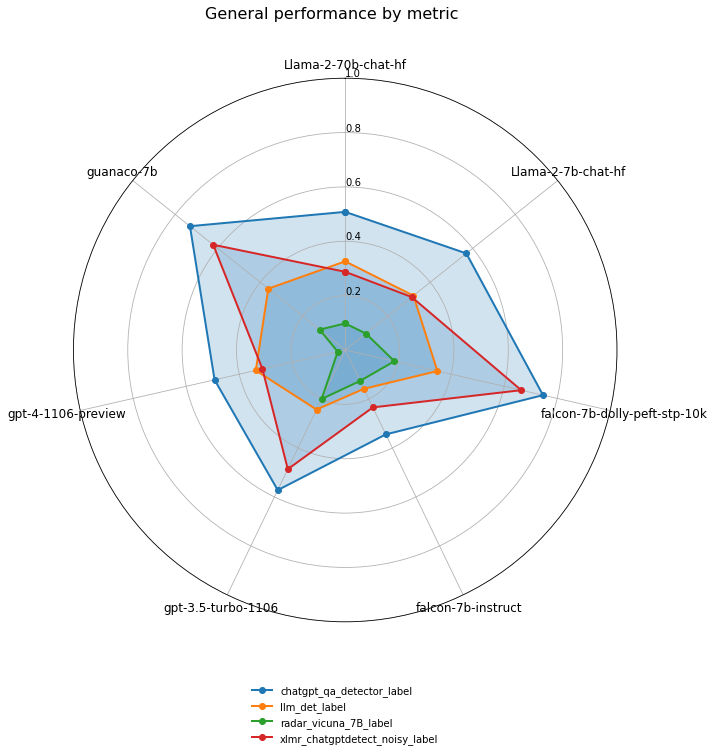

In [157]:
fig = plt.figure(figsize=(15, 10))
# gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1,1], wspace=0.1, hspace=0)

# dftmp = df_rs[~df_rs.group.isna()][ ["detector", "group"] + ["mcc"] ]
dftmp = df_rs[(~df_rs.generator.isna()) & (df_rs.group.isna())][ ["detector", "generator", "group"] + ["mcc"] ]
dftmp.generator = dftmp.generator.map(lambda v: v.split('/')[-1])
dftmp = dftmp.pivot(index=["detector"], columns=["generator"], values="mcc").reset_index()
make_chart_radar(dftmp, series_column="detector", ylim=(0.0,1.0), color_or_color_map=evaluator.COLOR_PALETTE_MODELS, 
                    fig=fig)#, subplot_specs=gs[0,0],  plot_legend=True)

# ax = fig.add_subplot(gs[0, 1])
# # dftmp = df_rs[~df_rs.generator.isna()][ ["detector", "generator"] + ["mcc"] ]
# dftmp = df_rs[~df_rs.generator.isna()][ ["detector", "generator"] + ["mcc", "f1"] ].melt(id_vars=["detector", "generator"], value_vars=["mcc", "f1"])
# # dftmp = df[df.group.isna()].head()[["detector"]+["gmean", "error_rate", "posLr", "negLr", "dor"]].melt(id_vars=["detector"])
# # dftmp.rename({"variable":"metric"}, axis=1, inplace=True)
# # dftmp.variable = dftmp.variable.map(self.metric_titles)
# # display(dftmp)
# sns.barplot(data=dftmp, x="variable", y="value", hue="detector")
# # plt.xticks(rotation=45)
# plt.xlabel("Metrics")
# # plt.ylabel("Counts")
fig.suptitle('General performance by metric', fontsize=16)

In [163]:
df_rs[~df_rs.generator.isna()][ ["detector", "generator", "group"] + ["mcc", "gmean", "f1"] ].group.map(lambda v: v.split(':')[-1] if v else None)

1                        None
2                   closed_qa
3              classification
4                     open_qa
5      information_extraction
                ...          
307                general_qa
308             summarization
309          creative_writing
310         review_generation
311         stance_generation
Name: group, Length: 308, dtype: object

,detector,generator,group,mcc,gmean,f1
1,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,None,0.508256,0.729480,0.779981
2,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,closed_qa,0.232043,0.515434,0.690513
3,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,classification,0.332489,0.520953,0.727273
4,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,open_qa,0.727509,0.862839,0.861925
5,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,information_extraction,0.114133,0.396296,0.673621
...,...,...,...,...,...,...
307,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,general_qa,0.322185,0.454242,0.342105
308,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,summarization,0.236343,0.448303,0.335443
309,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,creative_writing,0.409509,0.581598,0.505814
310,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,review_generation,0.302271,0.412540,0.290875


,detector,generator,task,metric,value
0,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,None,mcc,0.508256
1,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,closed_qa,mcc,0.232043
2,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,classification,mcc,0.332489
3,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,open_qa,mcc,0.727509
4,chatgpt_qa_detector_label,hf_inference_api_meta-llama/Llama-2-70b-chat-hf,information_extraction,mcc,0.114133
...,...,...,...,...,...
919,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,general_qa,f1,0.342105
920,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,summarization,f1,0.335443
921,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,creative_writing,f1,0.505814
922,radar_vicuna_7B_label,hf_model_tiiuae/falcon-7b_jco2/falcon-7b-dolly...,review_generation,f1,0.290875


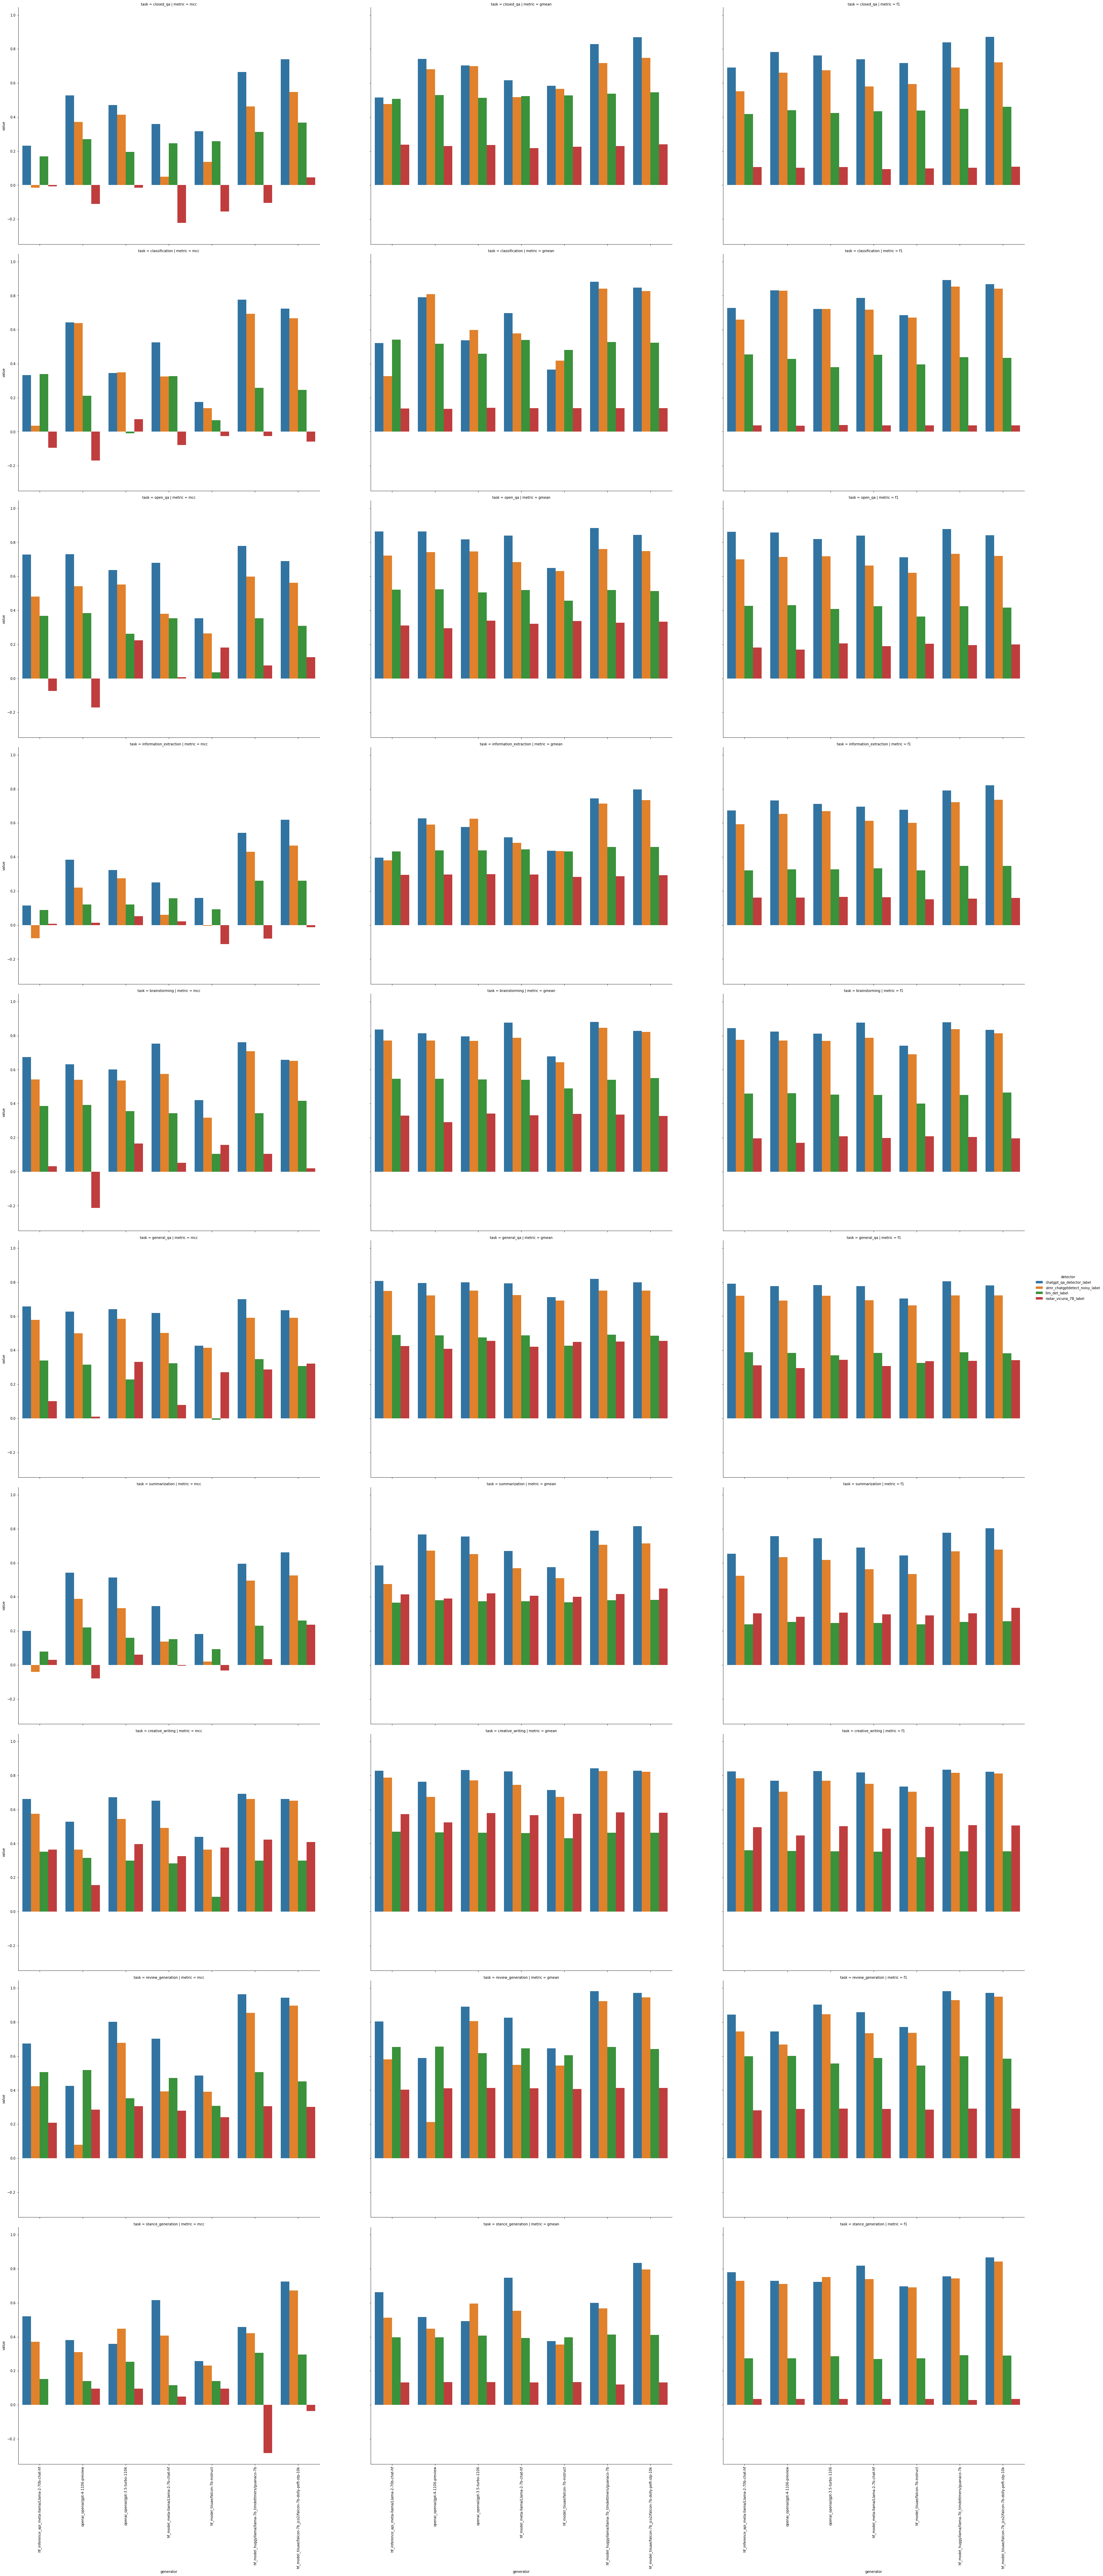

In [167]:
# plt.figure(figsize=(25, 12))

# dftmp = df_rs[~df_rs.group.isna()][ ["detector", "group"] + ["mcc", "tnr", "f1"] ].melt(id_vars=["detector", "group"], value_vars=["mcc", "tnr", "f1"])
# dftmp = df_rs[~df_rs.group.isna()][ ["detector", "group"] + ["mcc", "gmean", "f1"] ].melt(id_vars=["detector", "group"], value_vars=["mcc", "gmean", "f1"])
bdftmp = df_rs[~df_rs.generator.isna()][ ["detector", "generator", "group"] + ["mcc", "gmean", "f1"] ]
dftmp.group = dftmp.group.map(lambda v: v.split(':')[-1] if v else None)
dftmp = dftmp.melt(id_vars=["detector", "generator", "group"], value_vars=["mcc", "gmean", "f1"])
dftmp.rename({'group': 'task', 'variable': 'metric'}, inplace=True, axis=1)
# display(dftmp)
g = sns.catplot(
    data=dftmp, kind="bar",
    x="generator", y="value", col="metric", row="task", hue="detector",
    height=10, aspect=1.4,
)
g.set_xticklabels(rotation=90) 
# plt.xticks(rotation=90)
plt.show()

In [174]:
evaluator.COLOR_PALETTE_MODELS = define_color_palette(df_rs, for_column="detector", fixed={'human': '#7f7f7f'}) # human -> gray # fixed color-palette

{'detectorVSgenerator_bytask': <Figure size 3218.38x7200 with 30 Axes>}

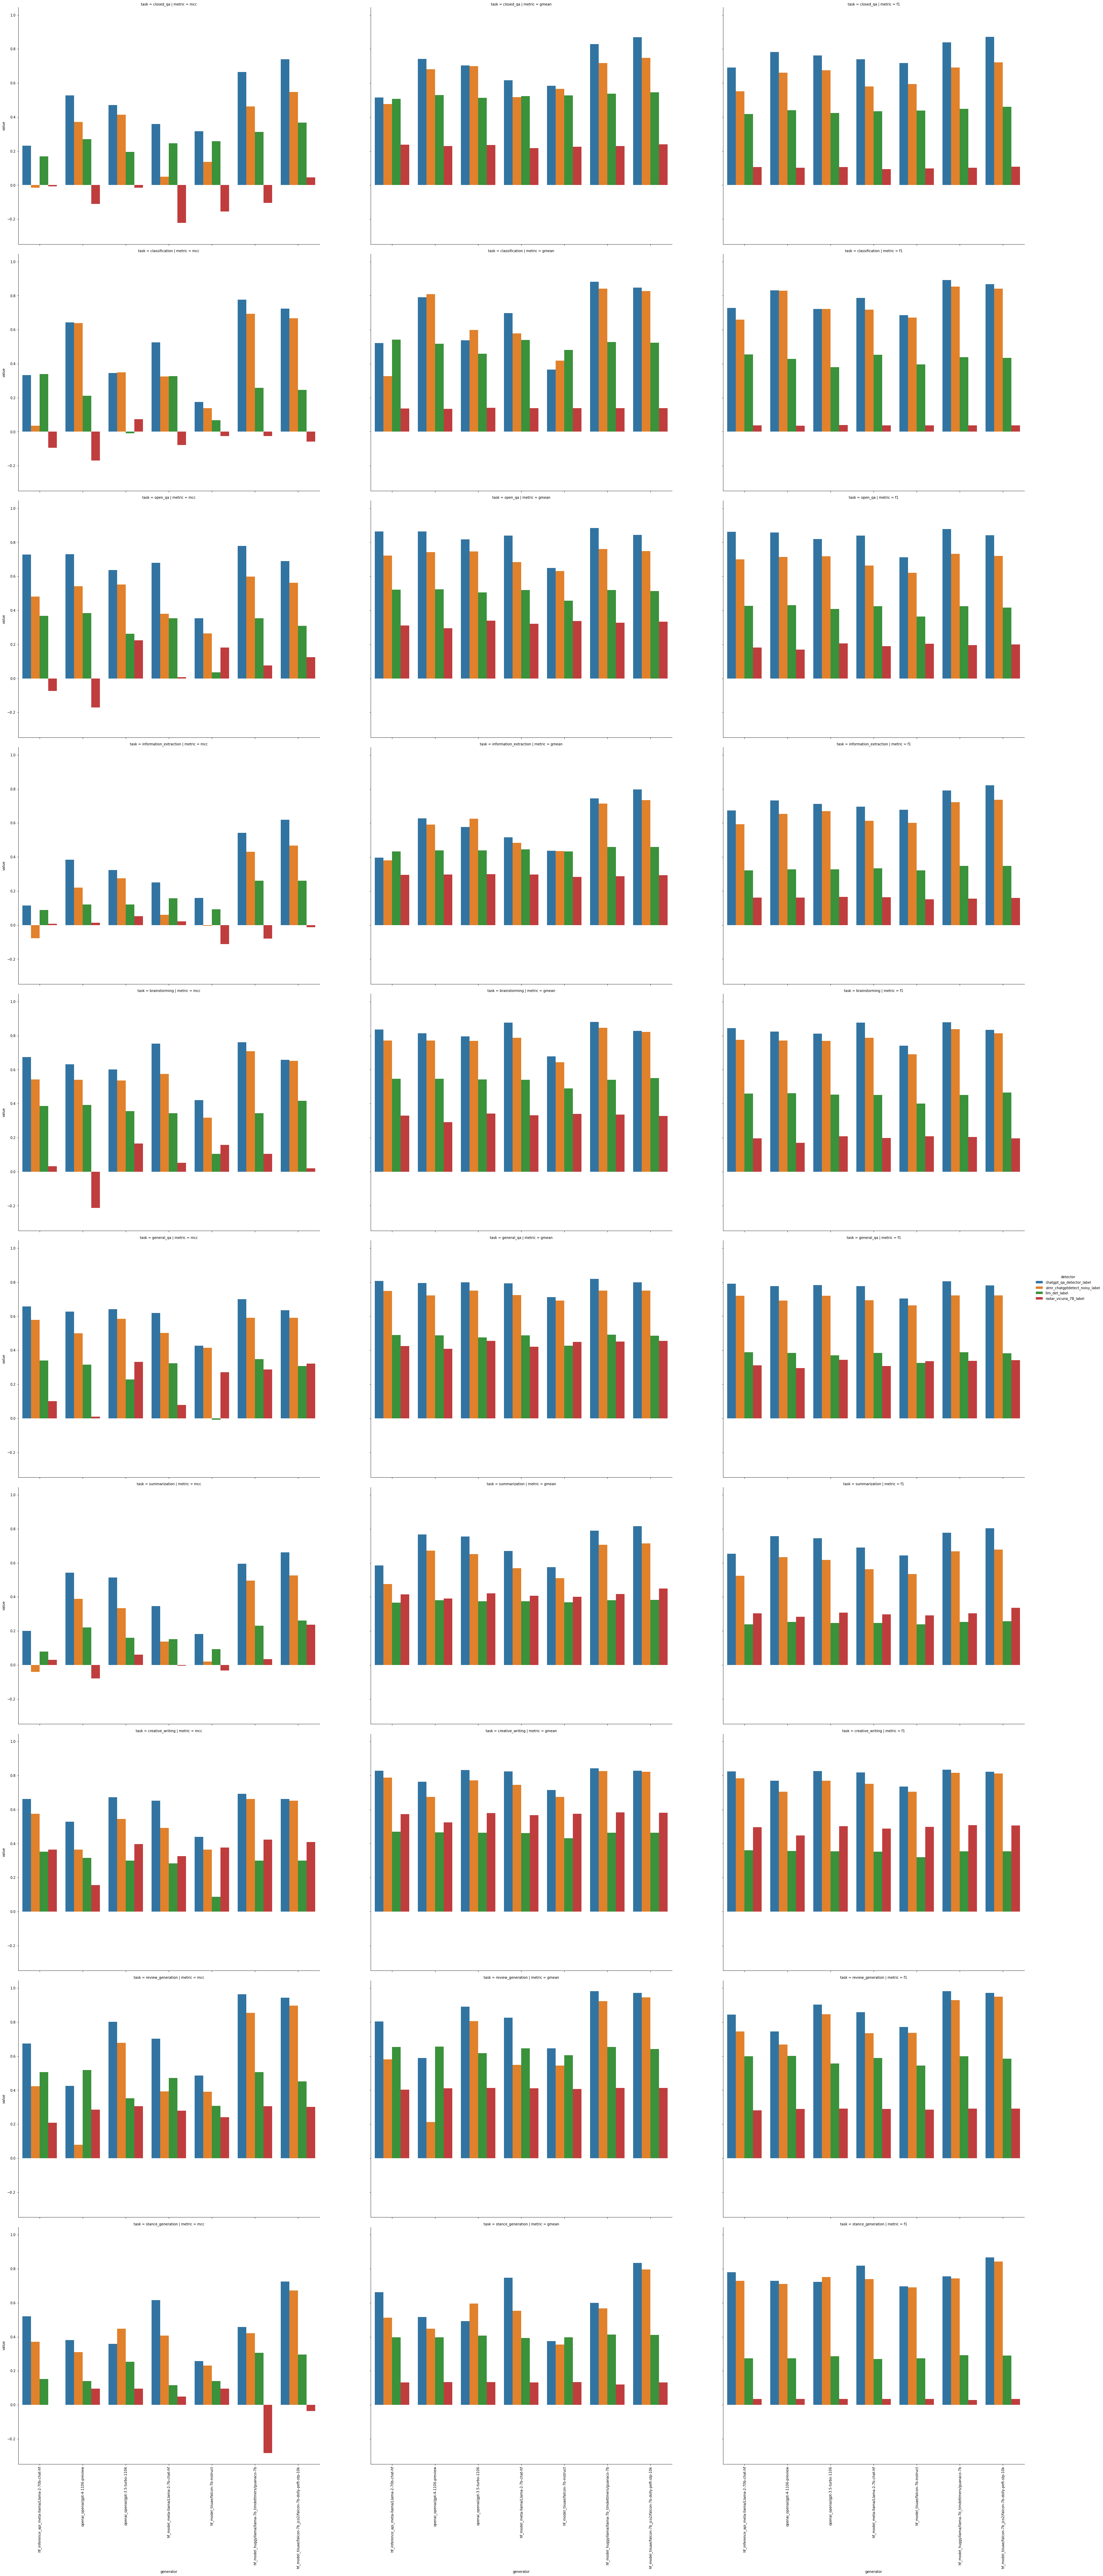

In [179]:
# evaluator.plot_overview_general_bymetric(df_rs) 
# evaluator.plot_radars_bytask_bymetric(df_rs) 
# evaluator.plot_overview_bytask_onemetric(df_rs, metric='f1') 
# evaluator.plot_detector_vs_generator_overview(df_rs, metric="mcc")
evaluator.plot_detector_vs_generator_bytask(df_rs, metrics=["mcc", "gmean", "f1"])
